## Advanced Portfolio Management Implementing Technical Strategies for Superior Returns

### Note Before Running the all Cells:
Please note that the execution of the code cells, particularly those at the beginning of Question 2, contains optimization functions. Depending on the processing power of your PC, this could take approximately 15-20 minutes. If you prefer to access the results, you may choose to skip to the output of Sensitivity Analysis section, which follows Question 3.

In [71]:
#Import Python libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import ticker
import numpy as np
import copy
from itertools import product
import seaborn as sns


#for beta calculation
from sklearn.linear_model import LinearRegression

# Put the aspect ratio of all the plots as (12,8)
aspect_ratio = (12, 8)
annualization_factor=260

In [72]:
#Read function read_price_data from HW 1
def read_price_data(filename, index_col= 0, parse_dates=True):
    
    # To read the CSV file specifying that the first Date column is the index column and parse the Dates as dateTimes
    df_stock = pd.read_csv(filename, index_col=0, parse_dates=True)
    
    # To display dataframe information
    print("Dataframe information:")    
    print(df_stock.info())
    print()
    
    # To check if any NULL values
    print("Checking for null values:")
    print(df_stock.isnull().sum()) 
    print()
    
    # To display summary statistics
    print("Displaying summary statisics:")
    print(df_stock.describe())
    
    return df_stock

In [73]:
# Read funtion plot_and_format_y_axis from HW2    
def plot_and_format_y_axis(data_frame, formatter=None, aspect_ratio=(12, 8), title="", ylabel="", grid=True):
    ax = data_frame.plot(figsize=aspect_ratio, title=title)
    
    if formatter is None:
        formatter = matplotlib.ticker.ScalarFormatter()
    ax.yaxis.set_major_formatter(formatter)
    
    # To set the y label
    ax.set_ylabel(ylabel)
    
    # To set the grid lines
    if grid:
        ax.grid(True)

In [74]:
# Read funtion print_pct_data from HW3
def print_pct_data(data_frame, format_spec="{:.4%}", na_rep="NaN", index_slice=None):
    if index_slice is not None:
        formatted_data_frame = data_frame.loc[index_slice].style.format(format_spec, na_rep=na_rep)
        unformatted_data_frame = data_frame.drop(index=index_slice)
    else:
        formatted_data_frame = data_frame.style.format(format_spec, na_rep=na_rep)
        unformatted_data_frame = pd.DataFrame()
    
    # We have used ChatGPT to understand how to format output based on index slicing
    display(formatted_data_frame)
    display(unformatted_data_frame)

In [75]:
# Read funtion calcSummaryStatistics from HW4
def calcSummaryStatistics(dataFrame, annualization_factor=260, print_Screen=True, percent_format_string="{:.2%}"):
    summary_stats = pd.DataFrame([
        annualization_factor * dataFrame.mean(),
        np.sqrt(annualization_factor) * dataFrame.std(),
        dataFrame.mean() / dataFrame.std() * np.sqrt(annualization_factor),
        (dataFrame.cumsum().fillna(0) - np.maximum.accumulate(dataFrame.cumsum().fillna(0))).min(axis=0),
        (dataFrame.dropna() >= 0).sum() / dataFrame.dropna().shape[0]
    ],
    index=['Average Annual Return', 'Annual Risk', 'Sharpe Ratio', 'Max Drawdown', 'Success Ratio'])
    
    if print_Screen:
        index_slice = ['Average Annual Return', 'Annual Risk', 'Max Drawdown', 'Success Ratio']
        print_pct_data(summary_stats, index_slice = index_slice, format_spec=percent_format_string)
        
# We have used ChatGPT to understand how to use print_screen in above function.

### Question 1 
#### Upload into Python the supplied data file which contains alphabetically arranged close price data from 12/31/1999 through 12/31/2018
1. 6 equity instruments:
    - Apple (AAPL), a technology company
    - Exelon Corp (EXC), a utility company
    - General Electric (GE), a diversified high-tech industrial company
    - Intel (INTC), a technology company
    - Pfizer (PFE), a pharmaceutical company
    - S&P 500 ETF (SPY), the broad market ETF 
2. b. 2 fixed income instruments:
    - Fidelity Investment Grade Bond Index (FBNDX)
    - Vanguard Total Bond Market Index (VBTIX)
3. 2 commodity instruments:
    - S&P GSCI Broad Commodity Index (SPGSCI)
    - Platinum (XPT)
4. 2 currency pairs:
    - Canadian Dollar (CAD)
    - British Pound (GBP)

In [76]:
dfPrices = read_price_data("Prices.csv")

Dataframe information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4780 entries, 1999-12-31 to 2018-12-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    4780 non-null   float64
 1   CAD     4780 non-null   float64
 2   EXC     4780 non-null   float64
 3   FBNDX   4780 non-null   float64
 4   GBP     4780 non-null   float64
 5   GE      4780 non-null   float64
 6   INTC    4780 non-null   float64
 7   PFE     4780 non-null   float64
 8   SPGSCI  4780 non-null   float64
 9   SPY     4780 non-null   float64
 10  VBTIX   4780 non-null   float64
 11  XPT     4780 non-null   float64
dtypes: float64(12)
memory usage: 485.5 KB
None

Checking for null values:
AAPL      0
CAD       0
EXC       0
FBNDX     0
GBP       0
GE        0
INTC      0
PFE       0
SPGSCI    0
SPY       0
VBTIX     0
XPT       0
dtype: int64

Displaying summary statisics:
              AAPL          CAD          EXC        FBNDX          GBP 

In [77]:
dfPrices.head()

,AAPL,CAD,EXC,FBNDX,GBP,GE,INTC,PFE,SPGSCI,SPY,VBTIX,XPT
Date,,,,,,,,,,,,
1999-12-31,0.917969,0.691515,12.393010,6.89,1.6182,309.753998,41.15625,30.775618,194.5372,146.8750,9.56,442.5
2000-01-03,0.999442,0.691181,12.080956,6.85,1.6362,300.246216,43.50000,30.241936,194.2237,145.4375,9.52,442.5
2000-01-04,0.915179,0.688326,11.991797,6.87,1.6360,288.236359,41.46875,29.115274,192.3673,139.7500,9.54,438.5
2000-01-05,0.928571,0.689655,12.571327,6.84,1.6426,287.735931,41.81250,29.589659,190.5185,140.0000,9.50,420.5
2000-01-06,0.848214,0.684978,12.593616,6.86,1.6474,291.582855,39.37500,30.657021,190.4214,137.7500,9.53,412.5


### Question 2.a Choose Instruments:
    - Any 5 equity instruments
    - 1 of the 2 fixed income instruments
    - 1 of the 2 commodity instruments
    - 1 of the 2 currency pairs 


### Chosen Instruments: AAPL, EXC, GE, PFE, SPY, FBNDX, SPGSCI, GBP

In [78]:
#chosen instruments
instruments = dfPrices[['AAPL', 'EXC', 'GE', 'PFE', 'SPY', 'FBNDX', 'SPGSCI', 'GBP']]
instruments.head()

,AAPL,EXC,GE,PFE,SPY,FBNDX,SPGSCI,GBP
Date,,,,,,,,
1999-12-31,0.917969,12.393010,309.753998,30.775618,146.8750,6.89,194.5372,1.6182
2000-01-03,0.999442,12.080956,300.246216,30.241936,145.4375,6.85,194.2237,1.6362
2000-01-04,0.915179,11.991797,288.236359,29.115274,139.7500,6.87,192.3673,1.6360
2000-01-05,0.928571,12.571327,287.735931,29.589659,140.0000,6.84,190.5185,1.6426
2000-01-06,0.848214,12.593616,291.582855,30.657021,137.7500,6.86,190.4214,1.6474


### Question 2.b Choosing Strategies:
We are
- Implementing all strategies i.e Benchmark, MA-Flat, MA-Short, & BB on each security.
- Choose the one that has highest Sharpe
- Implement Sensitivity Analysis on each instrument to get Optimal Parameters for each strategy
- For each instrument, plot the charts to identify Optimal Parameters that yeild Highest Sharpe
- From all charts available, select ball-park figures from high yeilding sharpe regions 
- Implement strategies again using these parameters

#### For MA-Flat/MA-Short Strategies identify which combination of windows is optimal

Create two functions, 
1. movingAverageCrossover: which takes as input a dataFrame with a single instrument, a fastWindow, and a slowWindow. This function then implements both moving average crossover strategies – one which goes flat and the other which goes short on the crossover.
2. calculateSharpeRatios: which takes as input the given instrument. It then runs the previous function for combinations (5 <= fastWindow < 110 in increments of 1) and (50 <= slowWindow < 300 in increments of 5)

In [79]:
def movingAverageCrossover (df, fastWindow, slowWindow):
        
    security_df = df.copy()
    security_name = security_df.columns[0]
    
    #Raise a ValueError if the supplied input dataFrame has more than one column.
    if len(security_df.columns) > 1: 
        raise ValueError("DataFrame should have only one column ")

    #Set up fast window
    security_df.loc[:,'FastSMA'] = security_df[security_name].rolling(fastWindow).mean()

    #Set up slow window
    security_df.loc[:,'SlowSMA'] = security_df[security_name].rolling(slowWindow).mean()

    #implement the MA crossover strategy. Long if fast > slow; flat otherwise
    # SMA strategy: if rising trend, stay long, otherwise go flat
    
    security_df.loc[:,'Position_Flat'] = np.where(security_df['FastSMA'] > security_df['SlowSMA'], 1, 0)
        
    #calculate benchmark returns

    benchmark_colname = security_name+'-BMK'                 
    security_df.loc[:,benchmark_colname ] = np.log(security_df[security_name] / security_df[security_name].shift(1))
    
    #calculate go flat strategy returns
    flat_colname = security_name+'-MAFlat'                        
    security_df.loc[:, flat_colname] = security_df['Position_Flat'].shift(1) * security_df[benchmark_colname]
    
    #calculate short strategy returns

    short_colname = security_name+'-MAShort'                 
    
    security_df.loc[:,'Position_Short'] = np.where(security_df['FastSMA'] > security_df['SlowSMA'], 1, -1)
    security_df.loc[:, short_colname] = security_df['Position_Short'].shift(1) * security_df[benchmark_colname]
    #drop NA's
    security_df.dropna(inplace=True)

    return(security_df[[benchmark_colname, flat_colname, short_colname]])

#we used chatgpt to correct some errors in the functions output

#### For BB  Strategy identify which combination of windows is optimal
Create 2 functions
1. bollingerBands: which takes as input a dataFrame with a single instrument, a lookbackWindow, and a stdevBand which specifies the # of standard deviations around the mean when the strategy goes “counter-trend.” This function then implements the Bollinger band strategy
2. calculateBollingerSharpeRatios: which takes as input the given instrument. It then runs the previous function for combinations (20 <= lookbackWindow < 50) and (1 <= stdevBand < 4)

In [80]:
def bollingerBands(df,dfName,lookbackWindow, stdevBand):
      
    security_df = copy.deepcopy(df)
    security_name = security_df.columns[0]
    
    #Raise a ValueError if the supplied input dataFrame has more than one column.
    if len(security_df.columns) > 1: 
        raise ValueError("DataFrame should have only one column ")
        
    # now we implement the Bollinger band based strategy
    security_df.loc[:,'Mean'] = security_df[security_name].rolling(lookbackWindow).mean()
    security_df.loc[:,'Stdev'] = security_df[security_name].rolling(lookbackWindow).std()
    
    #drop NA's    
    security_df.dropna(inplace=True)
    
    #create the Upper and Lower bands
    security_df.loc[:,'Upper'] = security_df['Mean'] + stdevBand * security_df['Stdev']
    security_df.loc[:,'Lower'] = security_df['Mean'] - stdevBand * security_df['Stdev']

    #initialize the first row based on the close price next to the bands
    #initialize a new column called 'Position'
    #using .loc as before
    date0 = security_df.index[0]
    if security_df.loc[date0,security_name] >= security_df.loc[date0, 'Upper']:
        security_df.loc[date0, 'Position'] = -1
    elif security_df.loc[date0,security_name] <= security_df.loc[date0,'Lower']:
        security_df.loc[date0, 'Position'] = 1
    else:
        security_df.loc[date0, 'Position'] = 0

    #loop over the entire data set
    for i in range(1, security_df.shape[0]):
        today=security_df.index[i]
        yesterday=security_df.index[i-1]
        if security_df.loc[today,security_name] >= security_df.loc[today,'Upper']: # if close is above upper
            security_df.loc[today,'Position'] = -1 # then go short
        elif security_df.loc[today,security_name] <= security_df.loc[today,'Lower']: # if close is below lower
            security_df.loc[today,'Position'] = 1 # then go long
        elif security_df.loc[yesterday,'Position'] == -1 and security_df.loc[today,security_name] <= security_df.loc[today,'Mean']: # if prev day is short and we're now below the mean
            security_df.loc[today,'Position']=0 # then flatten
        elif security_df.loc[yesterday,'Position'] == 1 and security_df.loc[today, security_name] >= security_df.loc[today, 'Mean']: # conversely...
            security_df.loc[today,'Position']=0 # then also flatten
        else: # otherwise just hold yesterday's position
            security_df.loc[today,'Position']=security_df.loc[yesterday,'Position']
    
    #calculate stock price log returns
    benchmark_colname = security_name+'-BMK'
    security_df.loc[:,benchmark_colname] = np.log(security_df[security_name] / security_df[security_name].shift(1))
    
    #calculate the rturns of the Bollinger strategy, taking care to lag the positions by one day
    #today's Bollinger return = last night's Bollinger position times today's Close Price return
    bollinger_colname = security_name+'-BB'
    security_df.loc[:,bollinger_colname] = security_df['Position'].shift(1) * security_df[benchmark_colname]
    
    return(security_df[[benchmark_colname, bollinger_colname]])


def calculateBollingerSharpeRatios(df, dfName):
    annualization_factor = 260
    dfName = dfName
    bollinger_sharpes = []
    lookback_window_arr = []
    std_dev_arr = []

    lookback_window_range = range(20, 50)  
    stdev_band_range = range(1, 4)        

    for w in lookback_window_range:
        for s in stdev_band_range:        
            temp_returns = bollingerBands(df,dfName, w, s)
            bollinger_daily_returns = temp_returns[dfName+'-BB']
            if bollinger_daily_returns.std() != 0:
                lookback_window_arr.append(w)
                std_dev_arr.append(s)
                bollinger_sharpe = bollinger_daily_returns.mean() / bollinger_daily_returns.std() * np.sqrt(annualization_factor)
                bollinger_sharpes.append(bollinger_sharpe)

    return bollinger_sharpes, lookback_window_arr, std_dev_arr

#we used chatgpt to correct some errors in the functions output

### NOTE: The next few code cells until Question 3 involve executiion of optimization functions, which might take additional processing time. If you prefer to view the results immediately, you are welcome to skip ahead to the Sensitivity Analysis section.

### 1. Equity Instrument: Apple (AAPL)

In [81]:
#BMK Strategy: calculate log returns
AAPL_logReturns = np.log(dfPrices[['AAPL']] / dfPrices[['AAPL']].shift(1))
AAPL_BMKSharpe = AAPL_logReturns.mean()/AAPL_logReturns.std() *np.sqrt(annualization_factor)
AAPL_BMKSharpe

AAPL    0.472338
dtype: float64

In [82]:
#run optimization for MA
Fast_sma_range = range(5, 110, 1)
Slow_sma_range = range(50, 300, 5)

AAPL_flat_sharpes = []
AAPL_short_sharpes = []
AAPL_fast_window_arr = []
AAPL_slow_window_arr = []
AAPL_allCombos = product(Fast_sma_range, Slow_sma_range)
for s1, s2 in product(Fast_sma_range,Slow_sma_range):
    
    if(s1 < s2 ):     
        AAPL_fast_window_arr.append(s1)
        AAPL_slow_window_arr.append(s2)
        AAPL_temp_returns = movingAverageCrossover(dfPrices[['AAPL']], s1, s2)
        go_flat_sharpe = AAPL_temp_returns[['AAPL-MAFlat']].mean() / AAPL_temp_returns[['AAPL-MAFlat']].std() * np.sqrt(annualization_factor)
        AAPL_flat_sharpes.append(go_flat_sharpe)
        go_short_sharpe = AAPL_temp_returns[['AAPL-MAShort']].mean() / AAPL_temp_returns[['AAPL-MAShort']].std() * np.sqrt(annualization_factor)
        AAPL_short_sharpes.append(go_short_sharpe)

# Find the index of the maximum Sharpe point
AAPL_max_sharpe_index_flat = np.argmax(AAPL_flat_sharpes)
AAPL_max_sharpe_index_short = np.argmax(AAPL_short_sharpes)


In [83]:
#run optimization for BB
AAPL_sharpes, AAPL_lookback_windows, AAPL_stdevs = calculateBollingerSharpeRatios(dfPrices[['AAPL']],'AAPL')

# Find the index of the maximum Sharpe point
AAPL_max_sharpe_index_bb = np.argmax(AAPL_sharpes)

In [84]:
AAPL_flat_sharpes[AAPL_max_sharpe_index_flat]

AAPL-MAFlat    1.012403
dtype: float64

### 2. Equity Instrument: Exelon Corp (EXC)

In [85]:
#BMK Strategy: calculate log returns
EXC_logReturns = np.log(dfPrices[['EXC']] / dfPrices[['EXC']].shift(1))
EXC_BMKSharpe = EXC_logReturns.mean()/EXC_logReturns.std() *np.sqrt(annualization_factor)
EXC_BMKSharpe

EXC    0.198705
dtype: float64

In [86]:
#run optimization for MA
Fast_sma_range = range(5, 110, 1)
Slow_sma_range = range(50, 300, 5)

EXC_flat_sharpes = []
EXC_short_sharpes = []
EXC_fast_window_arr = []
EXC_slow_window_arr = []
EXC_allCombos = product(Fast_sma_range, Slow_sma_range)
for s1, s2 in product(Fast_sma_range,Slow_sma_range):
    
    if(s1 < s2 ):     
        EXC_fast_window_arr.append(s1)
        EXC_slow_window_arr.append(s2)
        EXC_temp_returns = movingAverageCrossover(dfPrices[['EXC']], s1, s2)
        go_flat_sharpe = EXC_temp_returns[['EXC-MAFlat']].mean() / EXC_temp_returns[['EXC-MAFlat']].std() * np.sqrt(annualization_factor)
        EXC_flat_sharpes.append(go_flat_sharpe)
        go_short_sharpe = EXC_temp_returns[['EXC-MAShort']].mean() / EXC_temp_returns[['EXC-MAShort']].std() * np.sqrt(annualization_factor)
        EXC_short_sharpes.append(go_short_sharpe)

# Find the index of the maximum Sharpe point
EXC_max_sharpe_index_flat = np.argmax(EXC_flat_sharpes)
EXC_max_sharpe_index_short = np.argmax(EXC_short_sharpes)


In [87]:
#run optimization for BB
EXC_sharpes, EXC_lookback_windows, EXC_stdevs = calculateBollingerSharpeRatios(dfPrices[['EXC']],'EXC')

# Find the index of the maximum Sharpe point
EXC_max_sharpe_index_bb = np.argmax(EXC_sharpes)

### 3. Equity Instrument: General Electric (GE)

In [88]:
#BMK Strategy: calculate log returns
GE_logReturns = np.log(dfPrices[['GE']] / dfPrices[['GE']].shift(1))
GE_BMKSharpe = GE_logReturns.mean()/GE_logReturns.std() *np.sqrt(annualization_factor)
GE_BMKSharpe

GE   -0.332952
dtype: float64

In [89]:
#run optimization for MA
Fast_sma_range = range(5, 110, 1)
Slow_sma_range = range(50, 300, 5)

GE_flat_sharpes = []
GE_short_sharpes = []
GE_fast_window_arr = []
GE_slow_window_arr = []
GE_allCombos = product(Fast_sma_range, Slow_sma_range)
for s1, s2 in product(Fast_sma_range,Slow_sma_range):
    
    if(s1 < s2 ):     
        GE_fast_window_arr.append(s1)
        GE_slow_window_arr.append(s2)
        GE_temp_returns = movingAverageCrossover(dfPrices[['GE']], s1, s2)
        go_flat_sharpe = GE_temp_returns[['GE-MAFlat']].mean() / GE_temp_returns[['GE-MAFlat']].std() * np.sqrt(annualization_factor)
        GE_flat_sharpes.append(go_flat_sharpe)
        go_short_sharpe = GE_temp_returns[['GE-MAShort']].mean() / GE_temp_returns[['GE-MAShort']].std() * np.sqrt(annualization_factor)
        GE_short_sharpes.append(go_short_sharpe)

# Find the index of the maximum Sharpe point
GE_max_sharpe_index_flat = np.argmax(GE_flat_sharpes)
GE_max_sharpe_index_short = np.argmax(GE_short_sharpes)


In [90]:
#run optimization for BB
GE_sharpes, GE_lookback_windows, GE_stdevs = calculateBollingerSharpeRatios(dfPrices[['GE']],'GE')

# Find the index of the maximum Sharpe point
GE_max_sharpe_index_bb = np.argmax(GE_sharpes)

### 4. Equity Instrument: Pfizer (PFE)

In [91]:
#BMK Strategy: calculate log returns
PFE_logReturns = np.log(dfPrices[['PFE']] / dfPrices[['PFE']].shift(1))
PFE_BMKSharpe = PFE_logReturns.mean()/PFE_logReturns.std() *np.sqrt(annualization_factor)
PFE_BMKSharpe

PFE    0.06373
dtype: float64

In [92]:
#run optimization for MA
Fast_sma_range = range(5, 110, 1)
Slow_sma_range = range(50, 300, 5)

PFE_flat_sharpes = []
PFE_short_sharpes = []
PFE_fast_window_arr = []
PFE_slow_window_arr = []
PFE_allCombos = product(Fast_sma_range, Slow_sma_range)
for s1, s2 in product(Fast_sma_range,Slow_sma_range):
    
    if(s1 < s2 ):     
        PFE_fast_window_arr.append(s1)
        PFE_slow_window_arr.append(s2)
        PFE_temp_returns = movingAverageCrossover(dfPrices[['PFE']], s1, s2)
        go_flat_sharpe = PFE_temp_returns[['PFE-MAFlat']].mean() / PFE_temp_returns[['PFE-MAFlat']].std() * np.sqrt(annualization_factor)
        PFE_flat_sharpes.append(go_flat_sharpe)
        go_short_sharpe = PFE_temp_returns[['PFE-MAShort']].mean() / PFE_temp_returns[['PFE-MAShort']].std() * np.sqrt(annualization_factor)
        PFE_short_sharpes.append(go_short_sharpe)

# Find the index of the maximum Sharpe point
PFE_max_sharpe_index_flat = np.argmax(PFE_flat_sharpes)
PFE_max_sharpe_index_short = np.argmax(PFE_short_sharpes)


In [93]:
#run optimization for BB
PFE_sharpes, PFE_lookback_windows, PFE_stdevs = calculateBollingerSharpeRatios(dfPrices[['PFE']],'PFE')

# Find the index of the maximum Sharpe point
PFE_max_sharpe_index_bb = np.argmax(PFE_sharpes)

### 5. Equity Instrument: S & P 500 ETF (SPY)

In [94]:
#BMK Strategy: calculate log returns
SPY_logReturns = np.log(dfPrices[['SPY']] / dfPrices[['SPY']].shift(1))
SPY_BMKSharpe = SPY_logReturns.mean()/SPY_logReturns.std() *np.sqrt(annualization_factor)
SPY_BMKSharpe

SPY    0.147747
dtype: float64

In [95]:
#run optimization for MA
Fast_sma_range = range(5, 110, 1)
Slow_sma_range = range(50, 300, 5)

SPY_flat_sharpes = []
SPY_short_sharpes = []
SPY_fast_window_arr = []
SPY_slow_window_arr = []
SPY_allCombos = product(Fast_sma_range, Slow_sma_range)
for s1, s2 in product(Fast_sma_range,Slow_sma_range):
    
    if(s1 < s2 ):     
        SPY_fast_window_arr.append(s1)
        SPY_slow_window_arr.append(s2)
        SPY_temp_returns = movingAverageCrossover(dfPrices[['SPY']], s1, s2)
        go_flat_sharpe = SPY_temp_returns[['SPY-MAFlat']].mean() / SPY_temp_returns[['SPY-MAFlat']].std() * np.sqrt(annualization_factor)
        SPY_flat_sharpes.append(go_flat_sharpe)
        go_short_sharpe = SPY_temp_returns[['SPY-MAShort']].mean() / SPY_temp_returns[['SPY-MAShort']].std() * np.sqrt(annualization_factor)
        SPY_short_sharpes.append(go_short_sharpe)

# Find the index of the maximum Sharpe point
SPY_max_sharpe_index_flat = np.argmax(SPY_flat_sharpes)
SPY_max_sharpe_index_short = np.argmax(SPY_short_sharpes)


In [96]:
#run optimization for BB
SPY_sharpes, SPY_lookback_windows, SPY_stdevs = calculateBollingerSharpeRatios(dfPrices[['SPY']],'SPY')

# Find the index of the maximum Sharpe point
SPY_max_sharpe_index_bb = np.argmax(SPY_sharpes)

### 6. Fixed Income Instrument: Fidelity Investment Grade Bond Index (FBNDX)

In [97]:
#BMK Strategy: calculate log returns
FBNDX_logReturns = np.log(dfPrices[['FBNDX']] / dfPrices[['FBNDX']].shift(1))
FBNDX_BMKSharpe = FBNDX_logReturns.mean()/FBNDX_logReturns.std()
FBNDX_BMKSharpe

FBNDX    0.009535
dtype: float64

In [98]:
#run optimization for MA
Fast_sma_range = range(5, 110, 1)
Slow_sma_range = range(50, 300, 5)

FBNDX_flat_sharpes = []
FBNDX_short_sharpes = []
FBNDX_fast_window_arr = []
FBNDX_slow_window_arr = []
FBNDX_allCombos = product(Fast_sma_range, Slow_sma_range)
for s1, s2 in product(Fast_sma_range,Slow_sma_range):
    
    if(s1 < s2 ):     
        FBNDX_fast_window_arr.append(s1)
        FBNDX_slow_window_arr.append(s2)
        FBNDX_temp_returns = movingAverageCrossover(dfPrices[['FBNDX']], s1, s2)
        go_flat_sharpe = FBNDX_temp_returns[['FBNDX-MAFlat']].mean() / FBNDX_temp_returns[['FBNDX-MAFlat']].std() * np.sqrt(annualization_factor)
        FBNDX_flat_sharpes.append(go_flat_sharpe)
        go_short_sharpe = FBNDX_temp_returns[['FBNDX-MAShort']].mean() / FBNDX_temp_returns[['FBNDX-MAShort']].std() * np.sqrt(annualization_factor)
        FBNDX_short_sharpes.append(go_short_sharpe)

# Find the index of the maximum Sharpe point
FBNDX_max_sharpe_index_flat = np.argmax(FBNDX_flat_sharpes)
FBNDX_max_sharpe_index_short = np.argmax(FBNDX_short_sharpes)


In [99]:
#run optimization for BB
FBNDX_sharpes, FBNDX_lookback_windows, FBNDX_stdevs = calculateBollingerSharpeRatios(dfPrices[['FBNDX']],'FBNDX')

# Find the index of the maximum Sharpe point
FBNDX_max_sharpe_index_bb = np.argmax(FBNDX_sharpes)

### 7. Commodity Instrument: S&P GSCI Broad Commodity Index (SPGSCI) 

In [100]:
#BMK Strategy: calculate log returns
SPGSCI_logReturns = np.log(dfPrices[['SPGSCI']] / dfPrices[['SPGSCI']].shift(1))
SPGSCI_BMKSharpe = SPGSCI_logReturns.mean()/SPGSCI_logReturns.std()
SPGSCI_BMKSharpe

SPGSCI    0.009383
dtype: float64

In [101]:
#run optimization for MA
Fast_sma_range = range(5, 110, 1)
Slow_sma_range = range(50, 300, 5)

SPGSCI_flat_sharpes = []
SPGSCI_short_sharpes = []
SPGSCI_fast_window_arr = []
SPGSCI_slow_window_arr = []
SPGSCI_allCombos = product(Fast_sma_range, Slow_sma_range)
for s1, s2 in product(Fast_sma_range,Slow_sma_range):
    
    if(s1 < s2 ):     
        SPGSCI_fast_window_arr.append(s1)
        SPGSCI_slow_window_arr.append(s2)
        SPGSCI_temp_returns = movingAverageCrossover(dfPrices[['SPGSCI']], s1, s2)
        go_flat_sharpe = SPGSCI_temp_returns[['SPGSCI-MAFlat']].mean() / SPGSCI_temp_returns[['SPGSCI-MAFlat']].std() * np.sqrt(annualization_factor)
        SPGSCI_flat_sharpes.append(go_flat_sharpe)
        go_short_sharpe = SPGSCI_temp_returns[['SPGSCI-MAShort']].mean() / SPGSCI_temp_returns[['SPGSCI-MAShort']].std() * np.sqrt(annualization_factor)
        SPGSCI_short_sharpes.append(go_short_sharpe)

# Find the index of the maximum Sharpe point
SPGSCI_max_sharpe_index_flat = np.argmax(SPGSCI_flat_sharpes)
SPGSCI_max_sharpe_index_short = np.argmax(SPGSCI_short_sharpes)


In [102]:
#run optimization for BB
SPGSCI_sharpes, SPGSCI_lookback_windows, SPGSCI_stdevs = calculateBollingerSharpeRatios(dfPrices[['SPGSCI']],'SPGSCI')

# Find the index of the maximum Sharpe point
SPGSCI_max_sharpe_index_bb = np.argmax(SPGSCI_sharpes)

### 8. Currency Pair: British Pound (GBP)

In [103]:
#BMK Strategy: calculate log returns
GBP_logReturns = np.log(dfPrices[['GBP']] / dfPrices[['GBP']].shift(1))
GBP_BMKSharpe = GBP_logReturns.mean()/GBP_logReturns.std()
GBP_BMKSharpe

GBP   -0.008449
dtype: float64

In [104]:
#run optimization for MA
Fast_sma_range = range(5, 110, 1)
Slow_sma_range = range(50, 300, 5)

GBP_flat_sharpes = []
GBP_short_sharpes = []
GBP_fast_window_arr = []
GBP_slow_window_arr = []
GBP_allCombos = product(Fast_sma_range, Slow_sma_range)
for s1, s2 in product(Fast_sma_range,Slow_sma_range):
    
    if(s1 < s2 ):     
        GBP_fast_window_arr.append(s1)
        GBP_slow_window_arr.append(s2)
        GBP_temp_returns = movingAverageCrossover(dfPrices[['GBP']], s1, s2)
        go_flat_sharpe = GBP_temp_returns[['GBP-MAFlat']].mean() / GBP_temp_returns[['GBP-MAFlat']].std() * np.sqrt(annualization_factor)
        GBP_flat_sharpes.append(go_flat_sharpe)
        go_short_sharpe = GBP_temp_returns[['GBP-MAShort']].mean() / GBP_temp_returns[['GBP-MAShort']].std() * np.sqrt(annualization_factor)
        GBP_short_sharpes.append(go_short_sharpe)

# Find the index of the maximum Sharpe point
GBP_max_sharpe_index_flat = np.argmax(GBP_flat_sharpes)
GBP_max_sharpe_index_short = np.argmax(GBP_short_sharpes)


In [105]:
#run optimization for BB
GBP_sharpes, GBP_lookback_windows, GBP_stdevs = calculateBollingerSharpeRatios(dfPrices[['GBP']],'GBP')

# Find the index of the maximum Sharpe point
GBP_max_sharpe_index_bb = np.argmax(GBP_sharpes)

### Sensitivity Analysis
    1. Compare Sharpe Ratios of Each Strategy
    2. For every instrument, plot scatter-plots for each strategy and identify(star marked) Max Sharpe point 
    3. Select best parameters by analysing High Sharpe regions(green)

In [106]:
#print sharpe ratios of each strategy
sharpe_ratios = pd.DataFrame(columns=["BMK","MA-Flat","MA-Short","BB"])
sharpe_ratios.loc["AAPL Sharpe Ratios"] = [AAPL_BMKSharpe.item(),AAPL_flat_sharpes[AAPL_max_sharpe_index_flat].item(),AAPL_short_sharpes[AAPL_max_sharpe_index_short].item(),AAPL_sharpes[AAPL_max_sharpe_index_bb]]
sharpe_ratios.loc["EXC Sharpe Ratios"] = [EXC_BMKSharpe.item(),EXC_flat_sharpes[EXC_max_sharpe_index_flat].item(),EXC_short_sharpes[EXC_max_sharpe_index_short].item(),EXC_sharpes[EXC_max_sharpe_index_bb]]
sharpe_ratios.loc["GE Sharpe Ratios"] = [GE_BMKSharpe.item(),GE_flat_sharpes[GE_max_sharpe_index_flat].item(),GE_short_sharpes[GE_max_sharpe_index_short].item(),GE_sharpes[GE_max_sharpe_index_bb]]
sharpe_ratios.loc["PFE Sharpe Ratios"] = [PFE_BMKSharpe.item(),PFE_flat_sharpes[PFE_max_sharpe_index_flat].item(),PFE_short_sharpes[PFE_max_sharpe_index_short].item(),PFE_sharpes[PFE_max_sharpe_index_bb]]
sharpe_ratios.loc["SPY Sharpe Ratios"] = [SPY_BMKSharpe.item(),SPY_flat_sharpes[SPY_max_sharpe_index_flat].item(),SPY_short_sharpes[SPY_max_sharpe_index_short].item(),SPY_sharpes[SPY_max_sharpe_index_bb]]
sharpe_ratios.loc["FBNDX Sharpe Ratios"] = [FBNDX_BMKSharpe.item(),FBNDX_flat_sharpes[FBNDX_max_sharpe_index_flat].item(),FBNDX_short_sharpes[FBNDX_max_sharpe_index_short].item(),FBNDX_sharpes[FBNDX_max_sharpe_index_bb]]
sharpe_ratios.loc["SPGSCI Sharpe Ratios"] = [SPGSCI_BMKSharpe.item(),SPGSCI_flat_sharpes[SPGSCI_max_sharpe_index_flat].item(),SPGSCI_short_sharpes[SPGSCI_max_sharpe_index_short].item(),SPGSCI_sharpes[SPGSCI_max_sharpe_index_bb]]
sharpe_ratios.loc["GBP Sharpe Ratios"] = [GBP_BMKSharpe.item(),GBP_flat_sharpes[GBP_max_sharpe_index_flat].item(),GBP_short_sharpes[GBP_max_sharpe_index_short].item(),GBP_sharpes[GBP_max_sharpe_index_bb]]

sharpe_ratios

,BMK,MA-Flat,MA-Short,BB
AAPL Sharpe Ratios,0.472338,1.012403,0.823972,-0.084212
EXC Sharpe Ratios,0.198705,0.411737,0.376668,0.502148
GE Sharpe Ratios,-0.332952,0.247525,0.589357,0.151136
PFE Sharpe Ratios,0.063730,0.210169,0.258449,0.463788
SPY Sharpe Ratios,0.147747,0.654842,0.575818,0.417567
FBNDX Sharpe Ratios,0.009535,0.594192,0.700586,0.232195
SPGSCI Sharpe Ratios,0.009383,0.506085,0.614740,0.058027
GBP Sharpe Ratios,-0.008449,0.378544,0.559801,0.156858


### Scatter-Plots for each strategy

#### 1. AAPL Scatter Plots

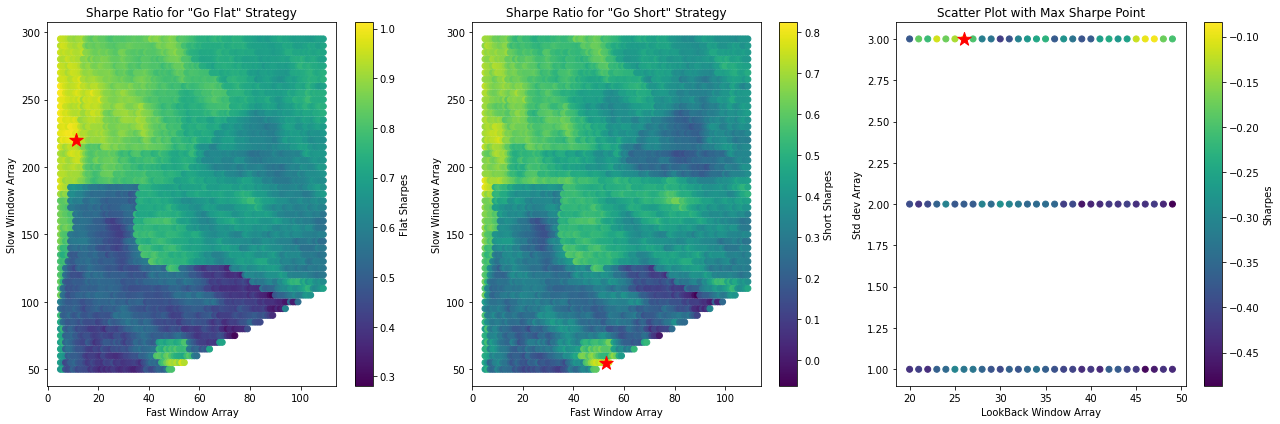

In [107]:
##Plots for AAPL
# fast_window_arr, slow_window_arr, flat_sharpes, short_sharpes, lookback_windows, stdevs, sharpes

# Initialize subplots: 1 row, 3 columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot for "Go Flat" Strategy
AAPL_max_sharpe_index_flat = np.argmax(AAPL_flat_sharpes)
scatter_flat = axes[0].scatter(AAPL_fast_window_arr, AAPL_slow_window_arr, c=AAPL_flat_sharpes, cmap='viridis')
axes[0].scatter(AAPL_fast_window_arr[AAPL_max_sharpe_index_flat], AAPL_slow_window_arr[AAPL_max_sharpe_index_flat], c='red', marker='*', s=200)
axes[0].set_xlabel('Fast Window Array')
axes[0].set_ylabel('Slow Window Array')
axes[0].set_title('Sharpe Ratio for "Go Flat" Strategy')
cbar_flat = fig.colorbar(scatter_flat, ax=axes[0])
cbar_flat.set_label('Flat Sharpes')

# Plot for "Go Short" Strategy
AAPL_max_sharpe_index_short = np.argmax(AAPL_short_sharpes)
scatter_short = axes[1].scatter(AAPL_fast_window_arr, AAPL_slow_window_arr, c=AAPL_short_sharpes, cmap='viridis')
axes[1].scatter(AAPL_fast_window_arr[AAPL_max_sharpe_index_short], AAPL_slow_window_arr[AAPL_max_sharpe_index_short], c='red', marker='*', s=200)
axes[1].set_xlabel('Fast Window Array')
axes[1].set_ylabel('Slow Window Array')
axes[1].set_title('Sharpe Ratio for "Go Short" Strategy')
cbar_short = fig.colorbar(scatter_short, ax=axes[1])
cbar_short.set_label('Short Sharpes')

# Plot for the third chart (assuming it's another strategy)
AAPL_max_sharpe_index_bb = np.argmax(AAPL_sharpes)
scatter_bb = axes[2].scatter(AAPL_lookback_windows, AAPL_stdevs, c=AAPL_sharpes, cmap='viridis')
axes[2].scatter(AAPL_lookback_windows[AAPL_max_sharpe_index_bb], AAPL_stdevs[AAPL_max_sharpe_index_bb], c='red', marker='*', s=200)
axes[2].set_xlabel('LookBack Window Array')
axes[2].set_ylabel('Std dev Array')
axes[2].set_title('Scatter Plot with Max Sharpe Point')
cbar_bb = fig.colorbar(scatter_bb, ax=axes[2])
cbar_bb.set_label('Sharpes')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


#### 2. EXC Scatter Plots

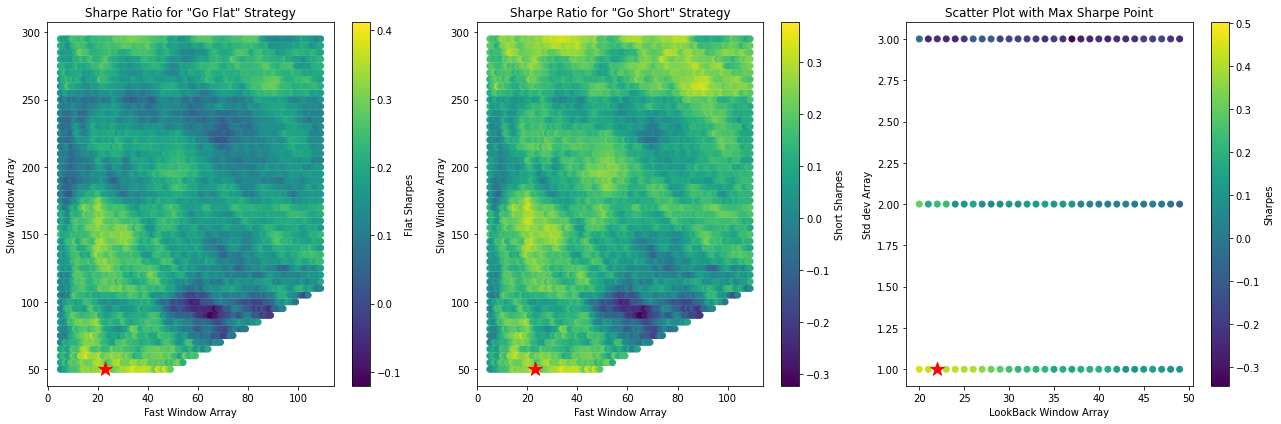

In [108]:
##Plots for EXC
# fast_window_arr, slow_window_arr, flat_sharpes, short_sharpes, lookback_windows, stdevs, sharpes

# Initialize subplots: 1 row, 3 columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot for "Go Flat" Strategy
EXC_max_sharpe_index_flat = np.argmax(EXC_flat_sharpes)
scatter_flat = axes[0].scatter(EXC_fast_window_arr, EXC_slow_window_arr, c=EXC_flat_sharpes, cmap='viridis')
axes[0].scatter(EXC_fast_window_arr[EXC_max_sharpe_index_flat], EXC_slow_window_arr[EXC_max_sharpe_index_flat], c='red', marker='*', s=200)
axes[0].set_xlabel('Fast Window Array')
axes[0].set_ylabel('Slow Window Array')
axes[0].set_title('Sharpe Ratio for "Go Flat" Strategy')
cbar_flat = fig.colorbar(scatter_flat, ax=axes[0])
cbar_flat.set_label('Flat Sharpes')

# Plot for "Go Short" Strategy
EXC_max_sharpe_index_short = np.argmax(EXC_short_sharpes)
scatter_short = axes[1].scatter(EXC_fast_window_arr, EXC_slow_window_arr, c=EXC_short_sharpes, cmap='viridis')
axes[1].scatter(EXC_fast_window_arr[EXC_max_sharpe_index_short], EXC_slow_window_arr[EXC_max_sharpe_index_short], c='red', marker='*', s=200)
axes[1].set_xlabel('Fast Window Array')
axes[1].set_ylabel('Slow Window Array')
axes[1].set_title('Sharpe Ratio for "Go Short" Strategy')
cbar_short = fig.colorbar(scatter_short, ax=axes[1])
cbar_short.set_label('Short Sharpes')

# Plot for the third chart (assuming it's another strategy)
EXC_max_sharpe_index_bb = np.argmax(EXC_sharpes)
scatter_bb = axes[2].scatter(EXC_lookback_windows, EXC_stdevs, c=EXC_sharpes, cmap='viridis')
axes[2].scatter(EXC_lookback_windows[EXC_max_sharpe_index_bb], EXC_stdevs[EXC_max_sharpe_index_bb], c='red', marker='*', s=200)
axes[2].set_xlabel('LookBack Window Array')
axes[2].set_ylabel('Std dev Array')
axes[2].set_title('Scatter Plot with Max Sharpe Point')
cbar_bb = fig.colorbar(scatter_bb, ax=axes[2])
cbar_bb.set_label('Sharpes')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


#### 3. GE Scatter Plots

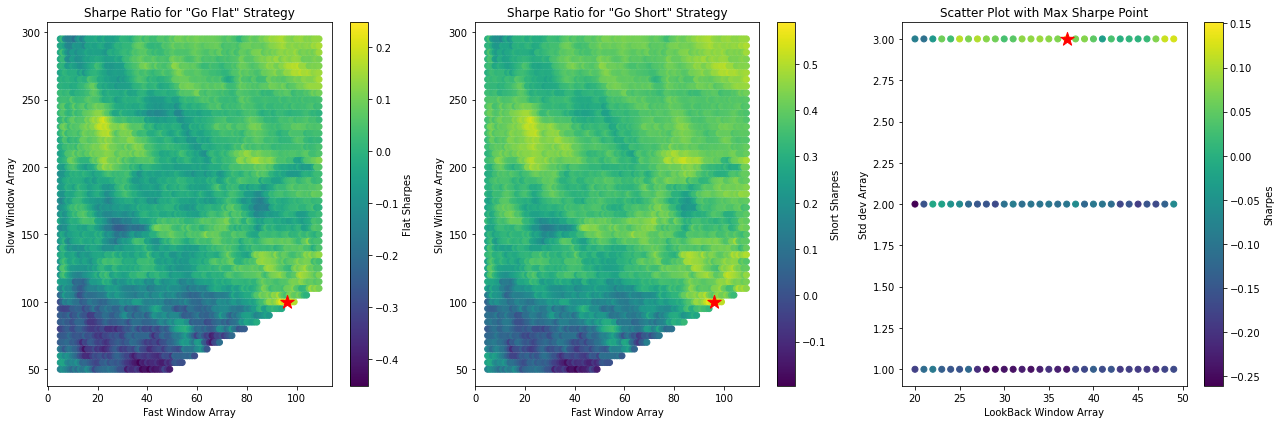

In [109]:
##Plots for GE
# fast_window_arr, slow_window_arr, flat_sharpes, short_sharpes, lookback_windows, stdevs, sharpes

# Initialize subplots: 1 row, 3 columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot for "Go Flat" Strategy
GE_max_sharpe_index_flat = np.argmax(GE_flat_sharpes)
scatter_flat = axes[0].scatter(GE_fast_window_arr, GE_slow_window_arr, c=GE_flat_sharpes, cmap='viridis')
axes[0].scatter(GE_fast_window_arr[GE_max_sharpe_index_flat], GE_slow_window_arr[GE_max_sharpe_index_flat], c='red', marker='*', s=200)
axes[0].set_xlabel('Fast Window Array')
axes[0].set_ylabel('Slow Window Array')
axes[0].set_title('Sharpe Ratio for "Go Flat" Strategy')
cbar_flat = fig.colorbar(scatter_flat, ax=axes[0])
cbar_flat.set_label('Flat Sharpes')

# Plot for "Go Short" Strategy
GE_max_sharpe_index_short = np.argmax(GE_short_sharpes)
scatter_short = axes[1].scatter(GE_fast_window_arr, GE_slow_window_arr, c=GE_short_sharpes, cmap='viridis')
axes[1].scatter(GE_fast_window_arr[GE_max_sharpe_index_short], GE_slow_window_arr[GE_max_sharpe_index_short], c='red', marker='*', s=200)
axes[1].set_xlabel('Fast Window Array')
axes[1].set_ylabel('Slow Window Array')
axes[1].set_title('Sharpe Ratio for "Go Short" Strategy')
cbar_short = fig.colorbar(scatter_short, ax=axes[1])
cbar_short.set_label('Short Sharpes')

# Plot for the third chart (assuming it's another strategy)
GE_max_sharpe_index_bb = np.argmax(GE_sharpes)
scatter_bb = axes[2].scatter(GE_lookback_windows, GE_stdevs, c=GE_sharpes, cmap='viridis')
axes[2].scatter(GE_lookback_windows[GE_max_sharpe_index_bb], GE_stdevs[GE_max_sharpe_index_bb], c='red', marker='*', s=200)
axes[2].set_xlabel('LookBack Window Array')
axes[2].set_ylabel('Std dev Array')
axes[2].set_title('Scatter Plot with Max Sharpe Point')
cbar_bb = fig.colorbar(scatter_bb, ax=axes[2])
cbar_bb.set_label('Sharpes')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


#### 4. PFE Scatter Plots

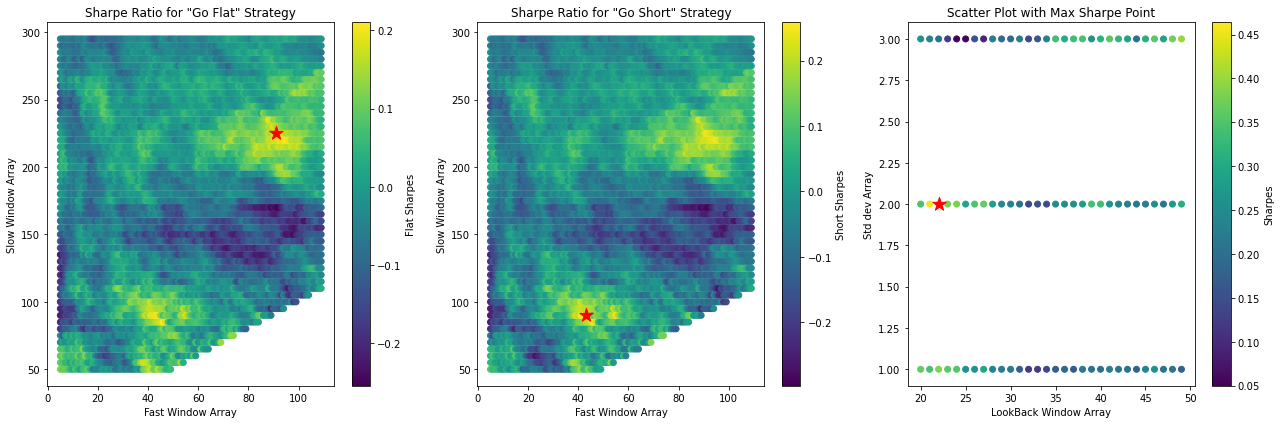

In [110]:
##Plots for PFE
# fast_window_arr, slow_window_arr, flat_sharpes, short_sharpes, lookback_windows, stdevs, sharpes

# Initialize subplots: 1 row, 3 columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot for "Go Flat" Strategy
PFE_max_sharpe_index_flat = np.argmax(PFE_flat_sharpes)
scatter_flat = axes[0].scatter(PFE_fast_window_arr, PFE_slow_window_arr, c=PFE_flat_sharpes, cmap='viridis')
axes[0].scatter(PFE_fast_window_arr[PFE_max_sharpe_index_flat], PFE_slow_window_arr[PFE_max_sharpe_index_flat], c='red', marker='*', s=200)
axes[0].set_xlabel('Fast Window Array')
axes[0].set_ylabel('Slow Window Array')
axes[0].set_title('Sharpe Ratio for "Go Flat" Strategy')
cbar_flat = fig.colorbar(scatter_flat, ax=axes[0])
cbar_flat.set_label('Flat Sharpes')

# Plot for "Go Short" Strategy
PFE_max_sharpe_index_short = np.argmax(PFE_short_sharpes)
scatter_short = axes[1].scatter(PFE_fast_window_arr, PFE_slow_window_arr, c=PFE_short_sharpes, cmap='viridis')
axes[1].scatter(PFE_fast_window_arr[PFE_max_sharpe_index_short], PFE_slow_window_arr[PFE_max_sharpe_index_short], c='red', marker='*', s=200)
axes[1].set_xlabel('Fast Window Array')
axes[1].set_ylabel('Slow Window Array')
axes[1].set_title('Sharpe Ratio for "Go Short" Strategy')
cbar_short = fig.colorbar(scatter_short, ax=axes[1])
cbar_short.set_label('Short Sharpes')

# Plot for the third chart (assuming it's another strategy)
PFE_max_sharpe_index_bb = np.argmax(PFE_sharpes)
scatter_bb = axes[2].scatter(PFE_lookback_windows, PFE_stdevs, c=PFE_sharpes, cmap='viridis')
axes[2].scatter(PFE_lookback_windows[PFE_max_sharpe_index_bb], PFE_stdevs[PFE_max_sharpe_index_bb], c='red', marker='*', s=200)
axes[2].set_xlabel('LookBack Window Array')
axes[2].set_ylabel('Std dev Array')
axes[2].set_title('Scatter Plot with Max Sharpe Point')
cbar_bb = fig.colorbar(scatter_bb, ax=axes[2])
cbar_bb.set_label('Sharpes')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


#### 5. SPY Scatter Plots

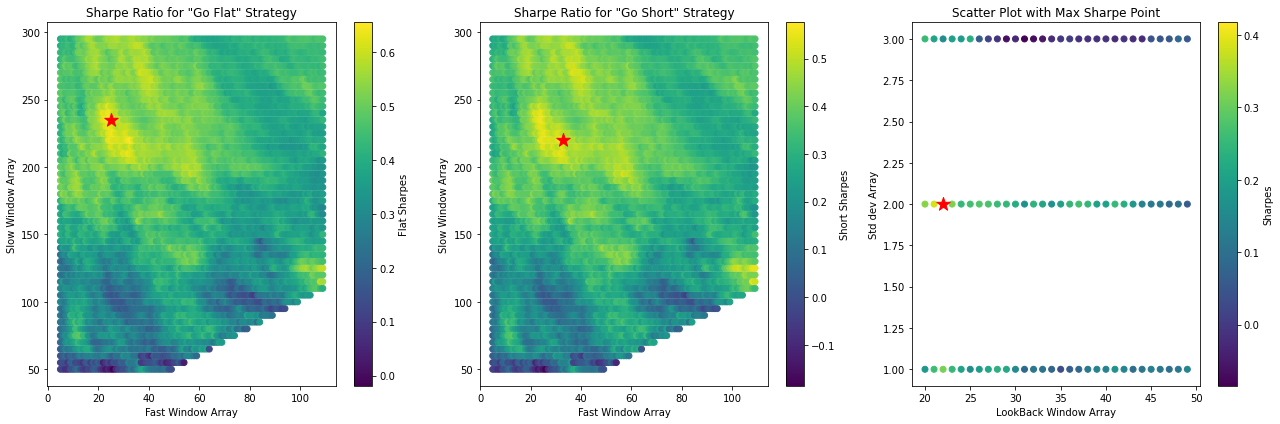

In [111]:
##Plots for SPY
# fast_window_arr, slow_window_arr, flat_sharpes, short_sharpes, lookback_windows, stdevs, sharpes

# Initialize subplots: 1 row, 3 columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot for "Go Flat" Strategy
SPY_max_sharpe_index_flat = np.argmax(SPY_flat_sharpes)
scatter_flat = axes[0].scatter(SPY_fast_window_arr, SPY_slow_window_arr, c=SPY_flat_sharpes, cmap='viridis')
axes[0].scatter(SPY_fast_window_arr[SPY_max_sharpe_index_flat], SPY_slow_window_arr[SPY_max_sharpe_index_flat], c='red', marker='*', s=200)
axes[0].set_xlabel('Fast Window Array')
axes[0].set_ylabel('Slow Window Array')
axes[0].set_title('Sharpe Ratio for "Go Flat" Strategy')
cbar_flat = fig.colorbar(scatter_flat, ax=axes[0])
cbar_flat.set_label('Flat Sharpes')

# Plot for "Go Short" Strategy
SPY_max_sharpe_index_short = np.argmax(SPY_short_sharpes)
scatter_short = axes[1].scatter(SPY_fast_window_arr, SPY_slow_window_arr, c=SPY_short_sharpes, cmap='viridis')
axes[1].scatter(SPY_fast_window_arr[SPY_max_sharpe_index_short], SPY_slow_window_arr[SPY_max_sharpe_index_short], c='red', marker='*', s=200)
axes[1].set_xlabel('Fast Window Array')
axes[1].set_ylabel('Slow Window Array')
axes[1].set_title('Sharpe Ratio for "Go Short" Strategy')
cbar_short = fig.colorbar(scatter_short, ax=axes[1])
cbar_short.set_label('Short Sharpes')

# Plot for the third chart (assuming it's another strategy)
SPY_max_sharpe_index_bb = np.argmax(SPY_sharpes)
scatter_bb = axes[2].scatter(SPY_lookback_windows, SPY_stdevs, c=SPY_sharpes, cmap='viridis')
axes[2].scatter(SPY_lookback_windows[SPY_max_sharpe_index_bb], SPY_stdevs[SPY_max_sharpe_index_bb], c='red', marker='*', s=200)
axes[2].set_xlabel('LookBack Window Array')
axes[2].set_ylabel('Std dev Array')
axes[2].set_title('Scatter Plot with Max Sharpe Point')
cbar_bb = fig.colorbar(scatter_bb, ax=axes[2])
cbar_bb.set_label('Sharpes')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


#### 6. FBNDX Scatter Plots

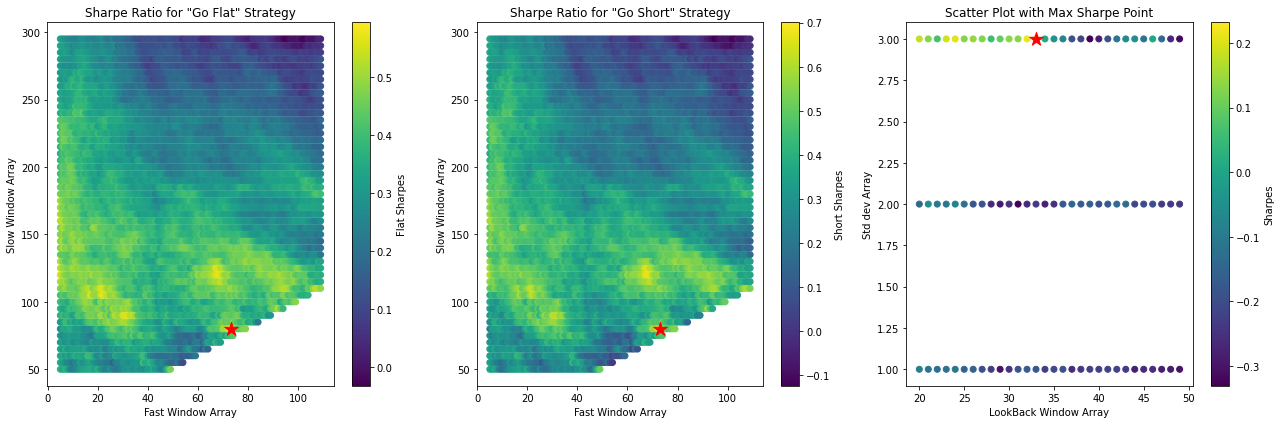

In [112]:
##Plots for FBNDX
# fast_window_arr, slow_window_arr, flat_sharpes, short_sharpes, lookback_windows, stdevs, sharpes

# Initialize subplots: 1 row, 3 columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot for "Go Flat" Strategy
FBNDX_max_sharpe_index_flat = np.argmax(FBNDX_flat_sharpes)
scatter_flat = axes[0].scatter(FBNDX_fast_window_arr, FBNDX_slow_window_arr, c=FBNDX_flat_sharpes, cmap='viridis')
axes[0].scatter(FBNDX_fast_window_arr[FBNDX_max_sharpe_index_flat], FBNDX_slow_window_arr[FBNDX_max_sharpe_index_flat], c='red', marker='*', s=200)
axes[0].set_xlabel('Fast Window Array')
axes[0].set_ylabel('Slow Window Array')
axes[0].set_title('Sharpe Ratio for "Go Flat" Strategy')
cbar_flat = fig.colorbar(scatter_flat, ax=axes[0])
cbar_flat.set_label('Flat Sharpes')

# Plot for "Go Short" Strategy
FBNDX_max_sharpe_index_short = np.argmax(FBNDX_short_sharpes)
scatter_short = axes[1].scatter(FBNDX_fast_window_arr, FBNDX_slow_window_arr, c=FBNDX_short_sharpes, cmap='viridis')
axes[1].scatter(FBNDX_fast_window_arr[FBNDX_max_sharpe_index_short], FBNDX_slow_window_arr[FBNDX_max_sharpe_index_short], c='red', marker='*', s=200)
axes[1].set_xlabel('Fast Window Array')
axes[1].set_ylabel('Slow Window Array')
axes[1].set_title('Sharpe Ratio for "Go Short" Strategy')
cbar_short = fig.colorbar(scatter_short, ax=axes[1])
cbar_short.set_label('Short Sharpes')

# Plot for the third chart (assuming it's another strategy)
FBNDX_max_sharpe_index_bb = np.argmax(FBNDX_sharpes)
scatter_bb = axes[2].scatter(FBNDX_lookback_windows, FBNDX_stdevs, c=FBNDX_sharpes, cmap='viridis')
axes[2].scatter(FBNDX_lookback_windows[FBNDX_max_sharpe_index_bb], FBNDX_stdevs[FBNDX_max_sharpe_index_bb], c='red', marker='*', s=200)
axes[2].set_xlabel('LookBack Window Array')
axes[2].set_ylabel('Std dev Array')
axes[2].set_title('Scatter Plot with Max Sharpe Point')
cbar_bb = fig.colorbar(scatter_bb, ax=axes[2])
cbar_bb.set_label('Sharpes')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


#### 7. SPGSCI Scatter Plots

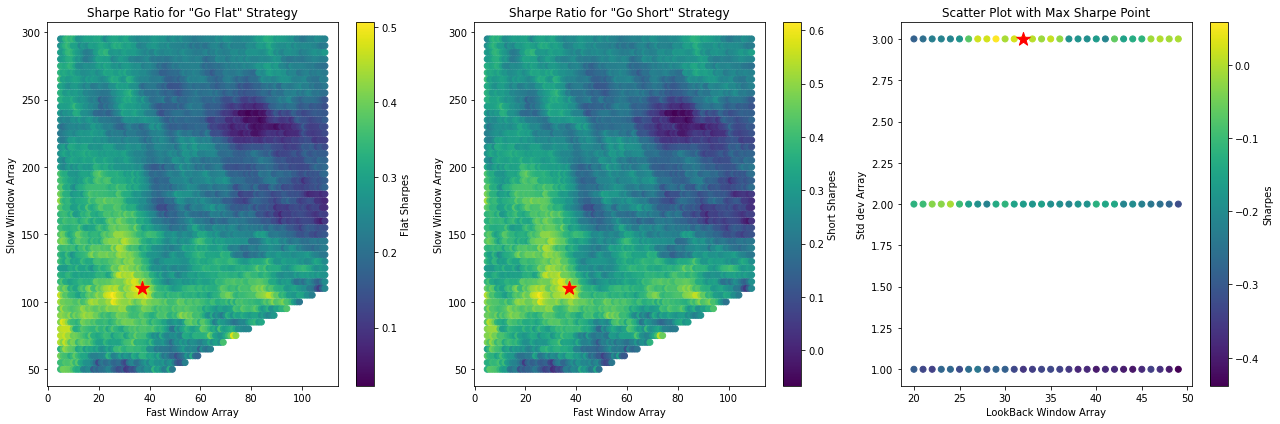

In [113]:
##Plots for SPGSCI
# fast_window_arr, slow_window_arr, flat_sharpes, short_sharpes, lookback_windows, stdevs, sharpes

# Initialize subplots: 1 row, 3 columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot for "Go Flat" Strategy
SPGSCI_max_sharpe_index_flat = np.argmax(SPGSCI_flat_sharpes)
scatter_flat = axes[0].scatter(SPGSCI_fast_window_arr, SPGSCI_slow_window_arr, c=SPGSCI_flat_sharpes, cmap='viridis')
axes[0].scatter(SPGSCI_fast_window_arr[SPGSCI_max_sharpe_index_flat], SPGSCI_slow_window_arr[SPGSCI_max_sharpe_index_flat], c='red', marker='*', s=200)
axes[0].set_xlabel('Fast Window Array')
axes[0].set_ylabel('Slow Window Array')
axes[0].set_title('Sharpe Ratio for "Go Flat" Strategy')
cbar_flat = fig.colorbar(scatter_flat, ax=axes[0])
cbar_flat.set_label('Flat Sharpes')

# Plot for "Go Short" Strategy
SPGSCI_max_sharpe_index_short = np.argmax(SPGSCI_short_sharpes)
scatter_short = axes[1].scatter(SPGSCI_fast_window_arr, SPGSCI_slow_window_arr, c=SPGSCI_short_sharpes, cmap='viridis')
axes[1].scatter(SPGSCI_fast_window_arr[SPGSCI_max_sharpe_index_short], SPGSCI_slow_window_arr[SPGSCI_max_sharpe_index_short], c='red', marker='*', s=200)
axes[1].set_xlabel('Fast Window Array')
axes[1].set_ylabel('Slow Window Array')
axes[1].set_title('Sharpe Ratio for "Go Short" Strategy')
cbar_short = fig.colorbar(scatter_short, ax=axes[1])
cbar_short.set_label('Short Sharpes')

# Plot for the third chart (assuming it's another strategy)
SPGSCI_max_sharpe_index_bb = np.argmax(SPGSCI_sharpes)
scatter_bb = axes[2].scatter(SPGSCI_lookback_windows, SPGSCI_stdevs, c=SPGSCI_sharpes, cmap='viridis')
axes[2].scatter(SPGSCI_lookback_windows[SPGSCI_max_sharpe_index_bb], SPGSCI_stdevs[SPGSCI_max_sharpe_index_bb], c='red', marker='*', s=200)
axes[2].set_xlabel('LookBack Window Array')
axes[2].set_ylabel('Std dev Array')
axes[2].set_title('Scatter Plot with Max Sharpe Point')
cbar_bb = fig.colorbar(scatter_bb, ax=axes[2])
cbar_bb.set_label('Sharpes')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


#### 8. GBP Scatter Plots

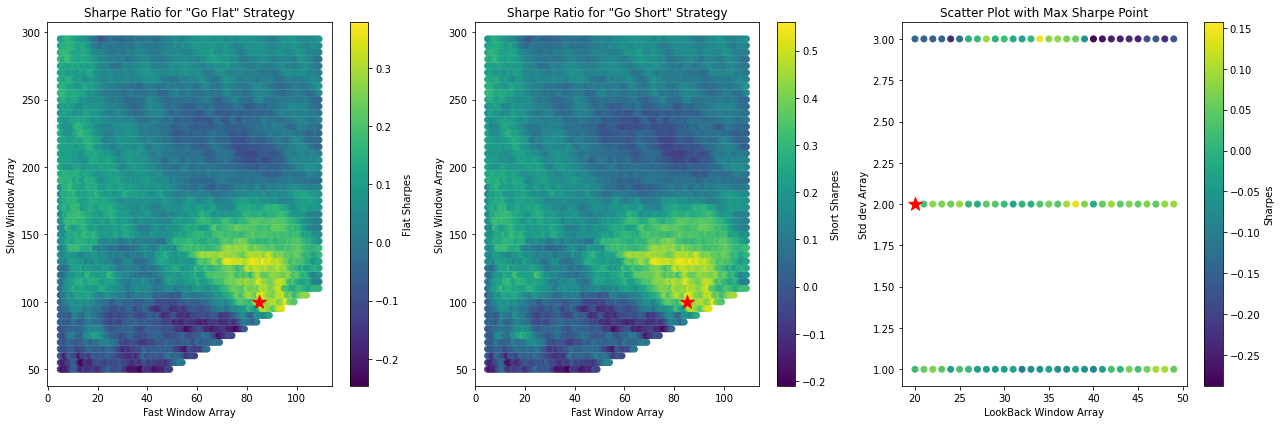

In [114]:
##Plots for GBP
# fast_window_arr, slow_window_arr, flat_sharpes, short_sharpes, lookback_windows, stdevs, sharpes

# Initialize subplots: 1 row, 3 columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot for "Go Flat" Strategy
GBP_max_sharpe_index_flat = np.argmax(GBP_flat_sharpes)
scatter_flat = axes[0].scatter(GBP_fast_window_arr, GBP_slow_window_arr, c=GBP_flat_sharpes, cmap='viridis')
axes[0].scatter(GBP_fast_window_arr[GBP_max_sharpe_index_flat], GBP_slow_window_arr[GBP_max_sharpe_index_flat], c='red', marker='*', s=200)
axes[0].set_xlabel('Fast Window Array')
axes[0].set_ylabel('Slow Window Array')
axes[0].set_title('Sharpe Ratio for "Go Flat" Strategy')
cbar_flat = fig.colorbar(scatter_flat, ax=axes[0])
cbar_flat.set_label('Flat Sharpes')

# Plot for "Go Short" Strategy
GBP_max_sharpe_index_short = np.argmax(GBP_short_sharpes)
scatter_short = axes[1].scatter(GBP_fast_window_arr, GBP_slow_window_arr, c=GBP_short_sharpes, cmap='viridis')
axes[1].scatter(GBP_fast_window_arr[GBP_max_sharpe_index_short], GBP_slow_window_arr[GBP_max_sharpe_index_short], c='red', marker='*', s=200)
axes[1].set_xlabel('Fast Window Array')
axes[1].set_ylabel('Slow Window Array')
axes[1].set_title('Sharpe Ratio for "Go Short" Strategy')
cbar_short = fig.colorbar(scatter_short, ax=axes[1])
cbar_short.set_label('Short Sharpes')

# Plot for the third chart (assuming it's another strategy)
GBP_max_sharpe_index_bb = np.argmax(GBP_sharpes)
scatter_bb = axes[2].scatter(GBP_lookback_windows, GBP_stdevs, c=GBP_sharpes, cmap='viridis')
axes[2].scatter(GBP_lookback_windows[GBP_max_sharpe_index_bb], GBP_stdevs[GBP_max_sharpe_index_bb], c='red', marker='*', s=200)
axes[2].set_xlabel('LookBack Window Array')
axes[2].set_ylabel('Std dev Array')
axes[2].set_title('Scatter Plot with Max Sharpe Point')
cbar_bb = fig.colorbar(scatter_bb, ax=axes[2])
cbar_bb.set_label('Sharpes')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


### Selecting Optimal Parameters
To meet the condition that all strategies should have the same parameters, 

1. For each strategy, we first identified the instruments that performed the best. This was based on their Sharpe Ratios, indicating a superior risk-adjusted return.

2. We then analyzed scatter plots for other instruments using the same strategies. Scatter plots provided insights for visually identifying trends or patterns in data, particularly how changes in parameters impacted performance.

3. By focusing on the area of the scatter plot where the best-performing instrument yielded the highest Sharpe Ratio, we adjusted the parameters for both the MA and BB strategies. This adjustment was done to align other instruments’ performance with that of the best performers, aiming to maximize the overall portfolio Sharpe Ratio.

In [115]:
#best parameters for MA
fast_window = 11
slow_window = 220

In [116]:
#best parameters for BB
lookback_window = 22
std_dev_band = 2

### Strategy Implementation for All Instruments

#### 1. AAPL -MA Flat

In [117]:
AAPL_MAFlat = movingAverageCrossover(dfPrices[['AAPL']],11,220)[['AAPL-MAFlat']]
AAPL_MAFlat_Sharpe = AAPL_MAFlat.mean()/AAPL_MAFlat.std() *np.sqrt(annualization_factor)
AAPL_MAFlat_Sharpe

AAPL-MAFlat    1.012403
dtype: float64

In [118]:
AAPL_MAShort = movingAverageCrossover(dfPrices[['AAPL']],11,220)[['AAPL-MAShort']]
AAPL_MAShort_Sharpe = AAPL_MAShort.mean()/AAPL_MAShort.std() *np.sqrt(annualization_factor)
AAPL_MAShort_Sharpe

AAPL-MAShort    0.768132
dtype: float64

In [119]:
AAPL_BB = bollingerBands(dfPrices[['AAPL']],'AAPL',22,2)[['AAPL-BB']]
AAPL_BB_Sharpe = AAPL_BB.mean()/AAPL_BB.std() *np.sqrt(annualization_factor)
AAPL_BB_Sharpe

AAPL-BB   -0.397146
dtype: float64

#### 2. EXC - BB

In [120]:
EXC_MAFlat = movingAverageCrossover(dfPrices[['EXC']],11,220)[['EXC-MAFlat']]
EXC_MAFlat_Sharpe = EXC_MAFlat.mean()/EXC_MAFlat.std() *np.sqrt(annualization_factor)
EXC_MAFlat_Sharpe

EXC-MAFlat    0.099251
dtype: float64

In [121]:
EXC_MAShort = movingAverageCrossover(dfPrices[['EXC']],11,220)[['EXC-MAShort']]
EXC_MAShort_Sharpe = EXC_MAShort.mean()/EXC_MAShort.std() *np.sqrt(annualization_factor)
EXC_MAShort_Sharpe

EXC-MAShort    0.038031
dtype: float64

In [122]:
EXC_BB = bollingerBands(dfPrices[['EXC']],'EXC',22,2)[['EXC-BB']]
EXC_BB_Sharpe = EXC_BB.mean()/EXC_BB.std() *np.sqrt(annualization_factor)
EXC_BB_Sharpe

EXC-BB    0.232389
dtype: float64

#### 3. GE - MA Short

In [123]:
GE_MAFlat = movingAverageCrossover(dfPrices[['GE']],11,220)[['GE-MAFlat']]
GE_MAFlat_Sharpe = GE_MAFlat.mean()/GE_MAFlat.std() *np.sqrt(annualization_factor)
GE_MAFlat_Sharpe

GE-MAFlat    0.033357
dtype: float64

In [124]:
GE_MAShort = movingAverageCrossover(dfPrices[['GE']],11,220)[['GE-MAShort']]
GE_MAShort_Sharpe = GE_MAShort.mean()/GE_MAShort.std() *np.sqrt(annualization_factor)
GE_MAShort_Sharpe

GE-MAShort    0.393545
dtype: float64

In [125]:
GE_BB = bollingerBands(dfPrices[['GE']],'GE',22,2)[['GE-BB']]
GE_BB_Sharpe = GE_BB.mean()/GE_BB.std() *np.sqrt(annualization_factor)
GE_BB_Sharpe

GE-BB   -0.014645
dtype: float64

#### 4. PFE - BB

In [126]:
PFE_MAFlat = movingAverageCrossover(dfPrices[['PFE']],11,220)[['PFE-MAFlat']]
PFE_MAFlat_Sharpe = PFE_MAFlat.mean()/PFE_MAFlat.std() *np.sqrt(annualization_factor)
PFE_MAFlat_Sharpe

PFE-MAFlat   -0.102827
dtype: float64

In [127]:
PFE_MAShort = movingAverageCrossover(dfPrices[['PFE']],11,220)[['PFE-MAShort']]
PFE_MAShort_Sharpe = PFE_MAShort.mean()/PFE_MAShort.std() *np.sqrt(annualization_factor)
PFE_MAShort_Sharpe

PFE-MAShort   -0.11357
dtype: float64

In [128]:
PFE_BB = bollingerBands(dfPrices[['PFE']],'PFE',22,2)[['PFE-BB']]
PFE_BB_Sharpe = PFE_BB.mean()/PFE_BB.std() *np.sqrt(annualization_factor)
PFE_BB_Sharpe

PFE-BB    0.463788
dtype: float64

#### 5. SPY - BB

In [129]:
SPY_MAFlat = movingAverageCrossover(dfPrices[['SPY']],11,220)[['SPY-MAFlat']]
SPY_MAFlat_Sharpe = SPY_MAFlat.mean()/SPY_MAFlat.std() *np.sqrt(annualization_factor)
SPY_MAFlat_Sharpe

SPY-MAFlat    0.515796
dtype: float64

In [130]:
SPY_MAShort = movingAverageCrossover(dfPrices[['SPY']],11,220)[['SPY-MAShort']]
SPY_MAShort_Sharpe = SPY_MAShort.mean()/SPY_MAShort.std() *np.sqrt(annualization_factor)
SPY_MAShort_Sharpe

SPY-MAShort    0.393366
dtype: float64

In [131]:
SPY_BB = bollingerBands(dfPrices[['SPY']],'SPY',22,2)[['SPY-BB']]
SPY_BB_Sharpe = SPY_BB.mean()/SPY_BB.std() *np.sqrt(annualization_factor)
SPY_BB_Sharpe

SPY-BB    0.417567
dtype: float64

#### 6. FBNDX - MA Flat

In [132]:
FBNDX_MAFlat = movingAverageCrossover(dfPrices[['FBNDX']],11,220)[['FBNDX-MAFlat']]
FBNDX_MAFlat_Sharpe = FBNDX_MAFlat.mean()/FBNDX_MAFlat.std() *np.sqrt(annualization_factor)
FBNDX_MAFlat_Sharpe

FBNDX-MAFlat    0.407569
dtype: float64

In [133]:
FBNDX_MAShort = movingAverageCrossover(dfPrices[['FBNDX']],11,220)[['FBNDX-MAShort']]
FBNDX_MAShort_Sharpe = FBNDX_MAShort.mean()/FBNDX_MAShort.std() *np.sqrt(annualization_factor)
FBNDX_MAShort_Sharpe

FBNDX-MAShort    0.438684
dtype: float64

In [134]:
FBNDX_BB = bollingerBands(dfPrices[['FBNDX']],'FBNDX',22,2)[['FBNDX-BB']]
FBNDX_BB_Sharpe = FBNDX_BB.mean()/FBNDX_BB.std() *np.sqrt(annualization_factor)
FBNDX_BB_Sharpe

FBNDX-BB   -0.106264
dtype: float64

#### 7. SPGSCI - MA Short

In [135]:
SPGSCI_MAFlat = movingAverageCrossover(dfPrices[['SPGSCI']],11,220)[['SPGSCI-MAFlat']]
SPGSCI_MAFlat_Sharpe = SPGSCI_MAFlat.mean()/SPGSCI_MAFlat.std() *np.sqrt(annualization_factor)
SPGSCI_MAFlat_Sharpe

SPGSCI-MAFlat    0.297546
dtype: float64

In [136]:
SPGSCI_MAShort = movingAverageCrossover(dfPrices[['SPGSCI']],11,220)[['SPGSCI-MAShort']]
SPGSCI_MAShort_Sharpe = SPGSCI_MAShort.mean()/SPGSCI_MAShort.std() *np.sqrt(annualization_factor)
SPGSCI_MAShort_Sharpe

SPGSCI-MAShort    0.335779
dtype: float64

In [137]:
SPGSCI_BB = bollingerBands(dfPrices[['SPGSCI']],'SPGSCI',22,2)[['SPGSCI-BB']]
SPGSCI_BB_Sharpe = SPGSCI_BB.mean()/SPGSCI_BB.std() *np.sqrt(annualization_factor)
SPGSCI_BB_Sharpe

SPGSCI-BB   -0.032084
dtype: float64

#### 8. GBP - MA SHort

In [138]:
GBP_MAFlat = movingAverageCrossover(dfPrices[['GBP']],11,220)[['GBP-MAFlat']]
GBP_MAFlat_Sharpe = GBP_MAFlat.mean()/GBP_MAFlat.std() *np.sqrt(annualization_factor)
GBP_MAFlat_Sharpe

GBP-MAFlat    0.107732
dtype: float64

In [139]:
GBP_MAShort = movingAverageCrossover(dfPrices[['GBP']],11,220)[['GBP-MAShort']]
GBP_MAShort_Sharpe = GBP_MAShort.mean()/GBP_MAShort.std() *np.sqrt(annualization_factor)
GBP_MAShort_Sharpe

GBP-MAShort    0.202543
dtype: float64

In [140]:
GBP_BB = bollingerBands(dfPrices[['GBP']],'GBP',22,2)[['GBP-BB']]
GBP_BB_Sharpe = GBP_BB.mean()/GBP_BB.std() *np.sqrt(annualization_factor)
GBP_BB_Sharpe

GBP-BB    0.079572
dtype: float64

### Our Chosen Strategies are:
- AAPL: MA Flat
- EXC: BB
- GE: MA Short
- PFE: BB
- SPY: BB
- FBNDX: MA Flat
- SPGSCI: MA Short
- GBP: MA Short

### Question 3
#### Explain your rationale for your choices. The aim is to have as high a Sharpe as possible for your final portfolio. You can generally achieve that by choosing high-Sharpe components of your portfolio but also by combining instruments that are not highly correlated. Sometimes, a low-Sharpe instrument may improve the overall portfolio Sharpe because of its low correlation with other instruments (the diversification benefit). With the instruments at hand, all equities will likely be highly correlated (although the correlations could potentially drop after application of one of the technical strategies), but the non-equity instruments may exhibit low, or even negative correlations. Please bear in mind that there is no right answer here. I am not looking for a “super-optimized” portfolio; what I’d like to see is your reasoning for what you pick. At the same time, your portfolio Sharpe should be better than every individual instrument Sharpe – otherwise, why would one bother constructing a portfolio? You would just use that single instrument which does better! 


### Answer

<b>Strategy Implementation:</b>

- We began by applying four different technical strategies (Benchmark, MA-Flat, MA-Short, and Bollinger Bands) to each equity security in our portfolio. 

- The objective was to see how these strategies affect the Sharpe Ratio of each instrument. Since the Sharpe Ratio is a measure of risk-adjusted return, so a higher Sharpe Ratio indicates a more favorable risk-return balance.

<b>Optimization Through Sensitivity Analysis:</b>

- Sensitivity Analysis was performed to determine the optimal parameters for each strategy. This involved adjusting the parameters (window size for moving averages or standard deviation bands for Bollinger Bands) and observing how these changes impact the Sharpe Ratio.

- We then created scatter plots for each instrument and strategy to visually identify the parameters that yielded the highest Sharpe Ratio. The points with the maximum Sharpe were marked with stars for clarity.

<b>Parameter Selection:</b>

- After analyzing the scatter plots, we selected 'ball-park' figures from the regions that showed high Sharpe Ratios. i.e we chose approximate values that seemed to consistently improve the Sharpe Ratio across different instruments and strategies.

- The final parameters you chose were: 
        - fast window of 11 and slow window of 220 for the Moving Averages strategies, and 
        - lookback window of 22 with standard deviation band of 2 for the Bollinger Bands strategy.

<b>Rationale for Choices:

Our primary goal was to construct a portfolio with a higher overall Sharpe Ratio than any individual instrument. We aimed for a portfolio that balances higher returns with manageable risk more effectively than any single investment could.
    
By analyzing different strategies and their impact on each instrument, we were able to identify which combination of strategies and parameters would likely yield the best risk-adjusted returns.
    
Our thought-process behind choosing these specific strategies and parameters was basically about diversification. 
  
Not all equities move in the same direction or at the same magnitude, so by using different strategies and parameters, we aimed to capitalize on these differences to enhance the overall portfolio performance.

### Question 4
#### Create a new dataFrame which has the daily returns of your 8 chosen strategies in the following format:
a. use the function you wrote in HW #6 so as to get appropriately named columns

b. the columns should be ordered as follows: first, your chosen 5 equities in
alphabetical order, then fixed income, then commodity, and finally currency

c. write a line of code which lists out the appropriate column names so that we can
copy + paste that line into our grading template, for e.g.:
myPortfolioColumns = ['AAPL-BB', 'EXC-MAShort', 'GEBMK', 'PFE-MAFlat', 'SPY-BMK', 'VBTIX-MAShort', 'XPTBB', 'CAD-BMK'] 


#### 4.a use the function you wrote in HW #6 so as to get appropriately named columns
#### 4.b the columns should be ordered as follows: first, your chosen 5 equities in alphabetical order, then fixed income, then commodity, and finally currency
    - Function from HW6 was used in #2.
    - Resulting merged df will have returns for best strategy for each instrument
    - i.e output of the functions from #2/#HW6 

In [141]:
#merge all the data frames from the resulting 
result_df = pd.merge(AAPL_MAFlat, EXC_BB, left_index=True, right_index=True)
result_df = pd.merge(result_df, GE_MAShort, left_index=True, right_index=True)
result_df = pd.merge(result_df, PFE_BB, left_index=True, right_index=True)
result_df = pd.merge(result_df, SPY_BB, left_index=True, right_index=True)
result_df = pd.merge(result_df, FBNDX_MAFlat, left_index=True, right_index=True)
result_df = pd.merge(result_df, SPGSCI_MAShort, left_index=True, right_index=True)
result_df = pd.merge(result_df, GBP_MAShort, left_index=True, right_index=True)
result_df

,AAPL-MAFlat,EXC-BB,GE-MAShort,PFE-BB,SPY-BB,FBNDX-MAFlat,SPGSCI-MAShort,GBP-MAShort
Date,,,,,,,,
2000-11-10,-0.0,0.000000,0.012680,-0.000000,-0.000000,0.000000,0.001055,0.005527
2000-11-13,0.0,0.000000,-0.046299,-0.000000,-0.000000,0.001430,0.008611,-0.008731
2000-11-14,0.0,-0.000000,0.025196,0.000000,0.000000,0.001428,0.014465,0.005020
2000-11-15,-0.0,0.000000,-0.004751,0.000000,0.000000,0.001426,0.020037,0.002660
2000-11-16,-0.0,0.000000,0.002378,0.000000,-0.000000,0.001423,-0.015001,0.000982
...,...,...,...,...,...,...,...,...
2018-12-24,-0.0,-0.000000,0.032697,-0.000000,-0.026778,0.000000,0.034847,-0.004812
2018-12-26,0.0,0.014721,-0.065712,0.039647,0.049290,-0.000000,-0.034605,0.005762
2018-12-27,-0.0,0.006722,0.016371,0.015522,0.007648,-0.000000,0.016042,-0.000870


In [142]:
calcSummaryStatistics(result_df)

,AAPL-MAFlat,EXC-BB,GE-MAShort,PFE-BB,SPY-BB,FBNDX-MAFlat,SPGSCI-MAShort,GBP-MAShort
Average Annual Return,27.81%,4.40%,12.21%,9.05%,5.18%,1.10%,7.93%,1.93%
Annual Risk,27.46%,19.13%,31.02%,18.56%,14.30%,2.69%,23.61%,9.52%
Max Drawdown,-55.13%,-57.30%,-90.44%,-30.51%,-45.95%,-10.02%,-81.60%,-33.52%
Success Ratio,65.93%,74.06%,51.81%,74.19%,77.13%,80.68%,51.46%,50.89%


,AAPL-MAFlat,EXC-BB,GE-MAShort,PFE-BB,SPY-BB,FBNDX-MAFlat,SPGSCI-MAShort,GBP-MAShort
Sharpe Ratio,1.012403,0.229992,0.393545,0.487826,0.362207,0.407569,0.335779,0.202543


#### 4.c write a line of code which lists out the appropriate column names so that we can copy + paste that line into our grading template, for e.g.: myPortfolioColumns = ['AAPL-BB', 'EXC-MAShort', 'GEBMK', 'PFE-MAFlat', 'SPY-BMK', 'VBTIX-MAShort', 'XPTBB', 'CAD-BMK']

In [143]:
myPortfolioColumns = result_df.columns.values.tolist()
myPortfolioColumns

['AAPL-MAFlat',
 'EXC-BB',
 'GE-MAShort',
 'PFE-BB',
 'SPY-BB',
 'FBNDX-MAFlat',
 'SPGSCI-MAShort',
 'GBP-MAShort']

### Question 5 
#### Correlation structure: Calculate the correlation matrix of the daily returns dataFrame you created in #4 and comment on the correlation structure. 

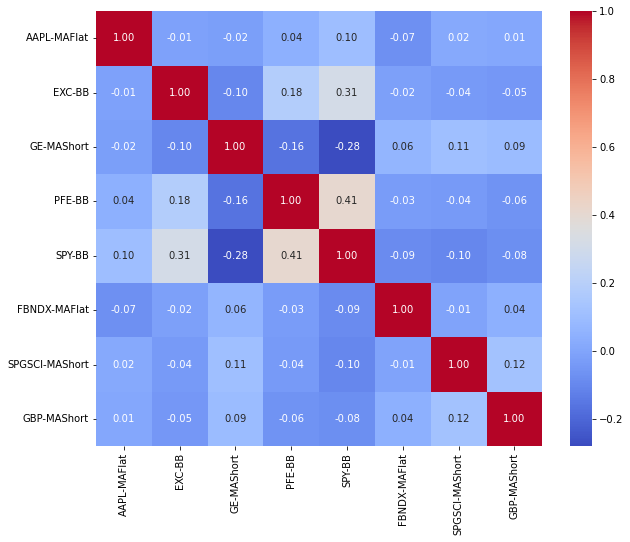

In [144]:
correlation_matrix = result_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

plt.show()

1. There is a strong positive correlation between SPY-BB and EXC-BB (0.31) and between SPY-BB and PFE-BB (0.41). This suggests that the S&P 500 broad market moves in tandem with Exelon Corp and Pfizer Inc stocks. When SPY goes up, EXC and PFE also tend to go up.

2. There is a strong negative correlation between GE-MAShort and SPY-BB (-0.28) and between GE-MAShort and EXC-BB (-0.10). This indicates that when the broad market and Exelon Corp rise, GE stock tends to fall, suggesting investors may be shorting GE stock.

3. SPGSCI-MAShort, which seems to represent a commodities index, has positive correlations with GE-MAShort and GBP-MAShort. When commodities rise, GE stock and the British Pound currency also tend to increase. This could indicate some macroeconomic factors driving both.

### Question 6
#### Weights: The next step is determine the instrument weighting scheme. The simple case is equal weights. Using the Matrix formulation for portfolio return and risk, calculate the annualized Sharpe of an equal-weighted portfolio of your chosen 8 strategies. Does the equal-weight portfolio outperform every individual strategy? You get 2 extra credit points if you implement this Sharpe calculation with a single line of code by simply applying a bunch of methods to your portfolio returns dataFrame.


In [145]:
#since its equal weights portfolio, we get returns by calculating mean, and risk by calculating stdev
#annulization factor = 260
# equal_wt_sharpe_ratio = (result_df.mean(axis=1) * 260).mean() / (result_df.std(axis=1) * np.sqrt(260)).mean()
# equal_wt_sharpe_ratio


# # Calculate equal weights
# num_strategies = 8
# weights = np.ones(num_strategies) / num_strategies

# # Calculate portfolio returns
# portfolio_returns = result_df.dot(weights)

# # Calculate portfolio volatility (standard deviation)
# portfolio_volatility = portfolio_returns.std()

# # Calculate annualized Sharpe ratio (assuming 252 trading days in a year)
# equal_wt_sharpe_ratio = np.sqrt(260) * (portfolio_returns.mean() / portfolio_volatility)

# print("Annualized Sharpe Ratio of Equal-Weighted Portfolio:", equal_wt_sharpe_ratio)


print("Annualized Sharpe Ratio of Equal-Weighted Portfolio:", np.sqrt(260) * (result_df.dot(np.ones(8) / 8).mean() / result_df.dot(np.ones(8) / 8).std()))

equal_wt_sharpe_ratio = (np.sqrt(260) * (result_df.dot(np.ones(8) / 8).mean() / result_df.dot(np.ones(8) / 8).std()))

Annualized Sharpe Ratio of Equal-Weighted Portfolio: 1.1905843197489334


<b>No! The equal weight portfolio outperforms every individual strategy in terms of sharpe ratio, except AAPL.
    
    AAPL Sharpe Ratio = 1.01
    Equal Wt Portfolio = 1.19

### Question 7
#### 7. MVO: To see if you can do better than equal weights, run a Mean-Variance optimization with your chosen strategies in order to determine the optimal weights. This step will be identical to the efficient frontier generation you did in HW #5. Use a 5,000-step Monte Carlo simulation with a seed of 64. Assemble all the different weight vectors so that you can identify the weights of the minimum-vol and the maximum- Sharpe portfolios. (The extra credit question #12 in HW #5.)

In [146]:
#given rng
rng = np.random.default_rng(seed=64)
#for 5,000 path Monte Carlo simulation
num_portfolios = 5000
annualization_factor = 260  # assuming daily returns for logReturns

#initialize arrays
all_weights = np.zeros((num_portfolios, 8))
prets = np.zeros(num_portfolios)
pvols = np.zeros(num_portfolios)
sharpe_ratios_mvo = np.zeros(num_portfolios)

#Monte-Carlo simulation
for i in range(num_portfolios):
    wts = rng.random(8)
    wts /= np.sum(wts)
    
    #save weights of all portfolios
    all_weights[i, :] = wts
    
    #returns of all portfolios
    prets[i] = np.sum(wts * result_df.mean().T) * annualization_factor
    
    #volatility of all portfolios
    pvols[i] = np.sqrt(np.dot(wts.T, np.dot(result_df.cov() * annualization_factor, wts.T)))
    
    #Sharpe ratios of all portfolios
    sharpe_ratios_mvo[i] = prets[i] / pvols[i]

#store all vectors in one dataframe
portfolio_metrics = pd.DataFrame({'Return': prets, 'Volatility': pvols, 'Sharpe Ratio': sharpe_ratios_mvo})
portfolio_weights = pd.DataFrame(all_weights, columns=myPortfolioColumns)

#merge the metrics and weights for complete portfolio information
portfolio_info = pd.concat([portfolio_metrics, portfolio_weights], axis=1)

In [147]:
min_vol_portfolio_sharpe = prets[np.argmin(pvols)]/pvols[np.argmin(pvols)]
min_vol_portfolio_sharpe

0.9088382342493949

In [148]:
max_sharpe_portfolio_sharpe = np.max(prets/pvols)
max_sharpe_portfolio_sharpe

1.3195152214363801

### Question 8
#### 8. Plot the risk/return scatter plot of all the 5,000 portfolios, ensuring that the axes are formatted correctly as percentages. Include a colorbar based on the Sharpe ratio, and use the reverse colormap as in HW #5.

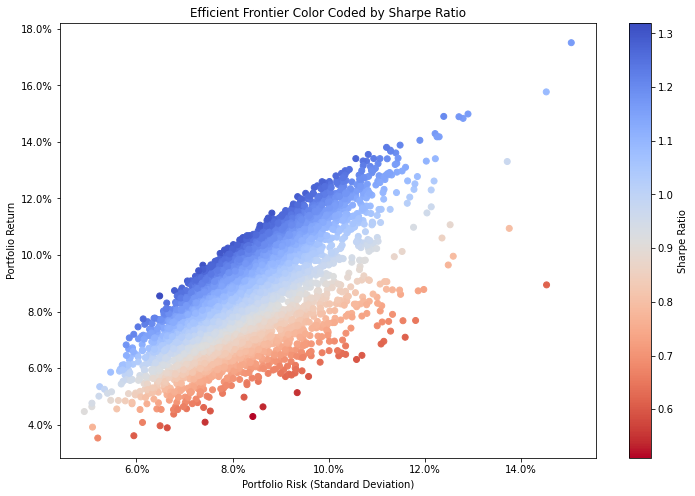

In [149]:
#set the aspect ratio
aspect_ratio = (12, 8)

#creating the scatter plot
plt.figure(figsize=aspect_ratio)
ax = plt.subplot()

#plot the efficient frontier
#color-coding based on the Sharpe ratio; reverse colour map
sc = plt.scatter(pvols, prets, c=sharpe_ratios_mvo, cmap='coolwarm_r', marker='o')

#format the axes to show percentages
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1.0, decimals=1))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1.0, decimals=1))

#add labels and title
plt.title('Efficient Frontier Color Coded by Sharpe Ratio')
plt.xlabel('Portfolio Risk (Standard Deviation)')
plt.ylabel('Portfolio Return')

#add a color bar
cb = plt.colorbar(sc)
cb.set_label('Sharpe Ratio')

plt.show()

### Question 9
#### Mark the minimum vol portfolio with a blue star. Present the weights of this portfolio and rationalize the weight vector, i.e., give a plausible explanation for that outcome of weights. Construct a legend for the star, and include in the legend the x- value (risk), y-value (return) and the Sharpe ratio.


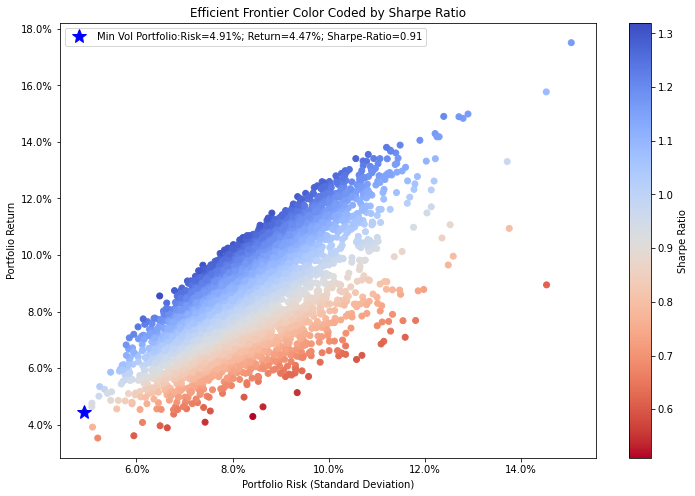

In [150]:
#set the aspect ratio
aspect_ratio = (12, 8)

#creating the scatter plot
plt.figure(figsize=aspect_ratio)
ax = plt.subplot()

#plot the efficient frontier
#color-coding based on the Sharpe ratio; reverse colour map
sc = plt.scatter(pvols, prets, c=sharpe_ratios_mvo, cmap='coolwarm_r', marker='o')

#format the axes to show percentages
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1.0, decimals=1))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1.0, decimals=1))

#add labels and title
plt.title('Efficient Frontier Color Coded by Sharpe Ratio')
plt.xlabel('Portfolio Risk (Standard Deviation)')
plt.ylabel('Portfolio Return')

#add the min vol portfolio marker
plt.plot(pvols[np.argmin(pvols)], prets[np.argmin(pvols)], 'b*', markersize=15.0, label='Min Vol Portfolio:Risk={:.2%}; Return={:.2%}; Sharpe-Ratio={:1.2f}'.format(pvols[np.argmin(pvols)], prets[np.argmin(pvols)], prets[np.argmin(pvols)]/pvols[np.argmin(pvols)])) 

#add a color bar
cb = plt.colorbar(sc)
cb.set_label('Sharpe Ratio')

plt.legend()
plt.show()

In [151]:
min_vol_portfolio_weights = portfolio_weights.loc[np.argmin(pvols)]
min_vol_portfolio_weights

AAPL-MAFlat       0.046966
EXC-BB            0.074289
GE-MAShort        0.005175
PFE-BB            0.023726
SPY-BB            0.241025
FBNDX-MAFlat      0.432201
SPGSCI-MAShort    0.082029
GBP-MAShort       0.094589
Name: 4998, dtype: float64

The weights are tailored to minimize risk while still maintaining potential for returns. For example, FBNDX-MAFlat, with the highest allocation at 43.22%, likely represents stability and lower risk. Conversely, SPY-BB, allocated 24.10%, balances the portfolio with a higher potential return, albeit with more risk. These weights are strategically chosen to reduce overall portfolio volatility.

### Question10 
#### Mark the maximum Sharpe portfolio with a red star. Present the weights of this portfolio and rationalize the weight vector. Construct a legend for the star, and include in the legend the x-value (risk), y-value (return) and the Sharpe ratio.

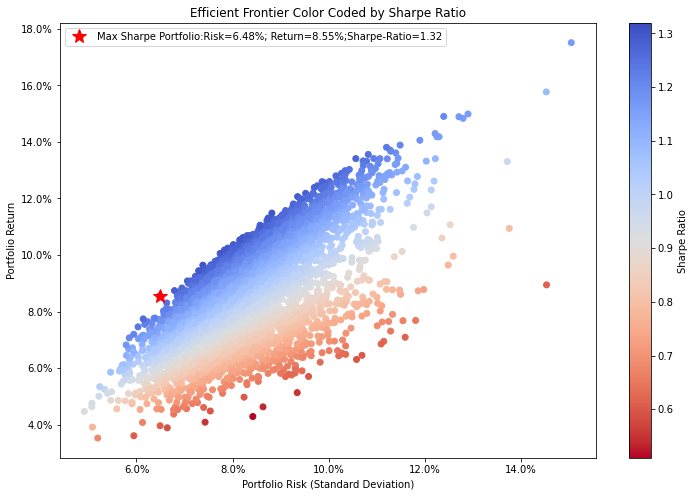

In [152]:
#set the aspect ratio for the plot
aspect_ratio = (12, 8)

#create the scatter plot
plt.figure(figsize=aspect_ratio)
ax = plt.subplot()

#plot the efficient frontier
#Color-coding based on the Sharpe ratio
sc = plt.scatter(pvols, prets, c=sharpe_ratios_mvo, cmap='coolwarm_r', marker='o')

#format the axes to show percentages
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1.0, decimals=1))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1.0, decimals=1))

#add labels and title
plt.title('Efficient Frontier Color Coded by Sharpe Ratio')
plt.xlabel('Portfolio Risk (Standard Deviation)')
plt.ylabel('Portfolio Return')

#add the max sharpe portfolio marker(red)
plt.plot(pvols[np.argmax(prets/pvols)], prets[np.argmax(prets/pvols)], 'r*', markersize=15.0, label='Max Sharpe Portfolio:Risk={:.2%}; Return={:.2%};Sharpe-Ratio={:1.2f}'.format(pvols[np.argmax(prets/pvols)], prets[np.argmax(prets/pvols)], np.max(prets/pvols)))

#add a color bar
cb = plt.colorbar(sc)
cb.set_label('Sharpe Ratio')

plt.legend()
plt.show()

In [153]:
max_vol_portfolio_weights = portfolio_weights.loc[np.argmax(prets/pvols)]
max_vol_portfolio_weights

AAPL-MAFlat       0.160216
EXC-BB            0.012492
GE-MAShort        0.096813
PFE-BB            0.136664
SPY-BB            0.125226
FBNDX-MAFlat      0.317312
SPGSCI-MAShort    0.056090
GBP-MAShort       0.095188
Name: 1957, dtype: float64

The weights in the Max Sharpe portfolio show a balance between risk and return. For example, FBNDX-MAFlat, with its low risk and stable returns, receives the highest allocation (31.73%), optimizing stability, while AAPL-MAFlat, offering higher returns albeit with greater risk, is allocated a significant portion (16.02%) to enhance potential gains. These weights are designed to maximize the overall risk-adjusted return of the portfolio.

### Question 11
#### Is the maximum Sharpe higher than the equal weight Sharpe from #6 above?

In [154]:
#max sharpe from MVO best portfolio
max_sharpe=portfolio_metrics['Sharpe Ratio'].max()
max_sharpe

1.3195152214363801

In [155]:
#sharpe ratio of equal weights portfolio
equal_wt_sharpe_ratio

1.1905843197489334

The Maximum Sharpe Ratio achieved through Mean-Variance Optimization (MVO) is 1.31, significantly surpassing the Sharpe Ratio of 0.51 obtained from the Equal Weight Portfolio strategy.

This indicates a more favorable risk-adjusted return profile for the MVO approach compared to the uniform allocation method.

### Question 12
#### To the dataframe you created in #4, add a 9th column which is the maximum Sharpe portfolio. Display the summary statistics of this portfolio and explain the salient features of this table, i.e., how the final portfolio compares with the individual components.

In [156]:
#find weights of Max Sharpe Portfolio

max_sharpe_idx = portfolio_metrics['Sharpe Ratio'].idxmax()
max_sharpe_weights = all_weights[max_sharpe_idx]

#find the daily returns of the max Sharpe portfolio
max_sharpe_portfolio_returns = result_df.dot(max_sharpe_weights)
max_sharpe_portfolio_returns

Date
2000-11-10    0.001813
2000-11-13   -0.004377
2000-11-14    0.004181
2000-11-15    0.001369
2000-11-16   -0.000066
                ...   
2018-12-24    0.001309
2018-12-26    0.004020
2018-12-27    0.005565
2018-12-28   -0.003501
2018-12-31    0.002286
Length: 4561, dtype: float64

In [157]:
#add this as a new column to dataframe from #4
result_df['MaxSharpePortfolio'] = max_sharpe_portfolio_returns
result_df

,AAPL-MAFlat,EXC-BB,GE-MAShort,PFE-BB,SPY-BB,FBNDX-MAFlat,SPGSCI-MAShort,GBP-MAShort,MaxSharpePortfolio
Date,,,,,,,,,
2000-11-10,-0.0,0.000000,0.012680,-0.000000,-0.000000,0.000000,0.001055,0.005527,0.001813
2000-11-13,0.0,0.000000,-0.046299,-0.000000,-0.000000,0.001430,0.008611,-0.008731,-0.004377
2000-11-14,0.0,-0.000000,0.025196,0.000000,0.000000,0.001428,0.014465,0.005020,0.004181
2000-11-15,-0.0,0.000000,-0.004751,0.000000,0.000000,0.001426,0.020037,0.002660,0.001369
2000-11-16,-0.0,0.000000,0.002378,0.000000,-0.000000,0.001423,-0.015001,0.000982,-0.000066
...,...,...,...,...,...,...,...,...,...
2018-12-24,-0.0,-0.000000,0.032697,-0.000000,-0.026778,0.000000,0.034847,-0.004812,0.001309
2018-12-26,0.0,0.014721,-0.065712,0.039647,0.049290,-0.000000,-0.034605,0.005762,0.004020
2018-12-27,-0.0,0.006722,0.016371,0.015522,0.007648,-0.000000,0.016042,-0.000870,0.005565


In [158]:
result_df.corr()

,AAPL-MAFlat,EXC-BB,GE-MAShort,PFE-BB,SPY-BB,FBNDX-MAFlat,SPGSCI-MAShort,GBP-MAShort,MaxSharpePortfolio
AAPL-MAFlat,1.000000,-0.011024,-0.019993,0.040816,0.101846,-0.070058,0.018968,0.008668,0.709050
EXC-BB,-0.011024,1.000000,-0.103254,0.184683,0.312675,-0.017548,-0.038241,-0.048874,0.123204
GE-MAShort,-0.019993,-0.103254,1.000000,-0.159586,-0.279412,0.064413,0.109083,0.090766,0.349719
PFE-BB,0.040816,0.184683,-0.159586,1.000000,0.409058,-0.032691,-0.036699,-0.063308,0.444161
SPY-BB,0.101846,0.312675,-0.279412,0.409058,1.000000,-0.088922,-0.104061,-0.075443,0.343937
FBNDX-MAFlat,-0.070058,-0.017548,0.064413,-0.032691,-0.088922,1.000000,-0.008832,0.044054,0.080506
SPGSCI-MAShort,0.018968,-0.038241,0.109083,-0.036699,-0.104061,-0.008832,1.000000,0.122940,0.239160
GBP-MAShort,0.008668,-0.048874,0.090766,-0.063308,-0.075443,0.044054,0.122940,1.000000,0.171224
MaxSharpePortfolio,0.709050,0.123204,0.349719,0.444161,0.343937,0.080506,0.239160,0.171224,1.000000


In [159]:
# Calculate summary statistics for the updated DataFrame including the new portfolio
calcSummaryStatistics(result_df)

,AAPL-MAFlat,EXC-BB,GE-MAShort,PFE-BB,SPY-BB,FBNDX-MAFlat,SPGSCI-MAShort,GBP-MAShort,MaxSharpePortfolio
Average Annual Return,27.81%,4.40%,12.21%,9.05%,5.18%,1.10%,7.93%,1.93%,8.55%
Annual Risk,27.46%,19.13%,31.02%,18.56%,14.30%,2.69%,23.61%,9.52%,6.48%
Max Drawdown,-55.13%,-57.30%,-90.44%,-30.51%,-45.95%,-10.02%,-81.60%,-33.52%,-8.79%
Success Ratio,65.93%,74.06%,51.81%,74.19%,77.13%,80.68%,51.46%,50.89%,54.09%


,AAPL-MAFlat,EXC-BB,GE-MAShort,PFE-BB,SPY-BB,FBNDX-MAFlat,SPGSCI-MAShort,GBP-MAShort,MaxSharpePortfolio
Sharpe Ratio,1.012403,0.229992,0.393545,0.487826,0.362207,0.407569,0.335779,0.202543,1.319515


1. The maximum drawdown of the Max Sharpe portfolio is only -8.79% compared to -55% to -90% for individual stocks. This shows combining assets smoothes the ride for investors.

2. With an annual return of 8.55% and risk of 6.48%, the Max Sharpe portfolio provides moderate returns for very low volatility compared to individual stocks that have risk levels from 18% to 31%.

3. Apple stock provides the highest standalone returns at 27.81% annually but has far higher risk at 27.46%. The Max Sharpe portfolio matches about a third of the return for less than a quarter the risk.

In summary, by blending assets with low correlations, the Maximum Sharpe portfolio protects the downside, reduces volatility, and still captures reasonable returns. This showcases the power of diversification in limiting risks while producing consistent performance.

### Question 13
#### Beta: Calculate the beta of your maximum Sharpe portfolio to the S&P 500. (Use the supplied SPY data.) What does your value of the beta imply?

To calculate beta of Max Sharpe Portfolio to "the market", which is the benchmark (log returns) of S&P 500
1. Set Up DataFrame for Beta Calculation
- We will merge the benchmark(log returns) of SPY to other securities of our Portfolio, for consistency in the number of rows. Which will be the same as Max Sharpe Portfolio
- Extract benchmark(log returns) of SPY
- Merge with returns of Max Sharpe Portfolio

2. Visualize the relationship between the Market(SnP 500) and our Portfolio using a scatter plot
3. Invoke the OLS Linear Regression and fit the regression(apply to SPY and our Portfolio)
4. Find alpha and beta

In [160]:
#set up dataframe
#NOTE: SPY returns were calculated in Q2
#NOTE: Max Sharpe portfolio returns were calculated in Q12

result_df_beta_calc = pd.merge(SPY_logReturns, result_df['MaxSharpePortfolio'], left_index=True, right_index=True)
result_df_beta_calc

,SPY,MaxSharpePortfolio
Date,,
2000-11-10,-0.024626,0.001813
2000-11-13,-0.007807,-0.004377
2000-11-14,0.025940,0.004181
2000-11-15,0.003140,0.001369
2000-11-16,-0.015798,-0.000066
...,...,...
2018-12-24,-0.026778,0.001309
2018-12-26,0.049290,0.004020
2018-12-27,0.007648,0.005565


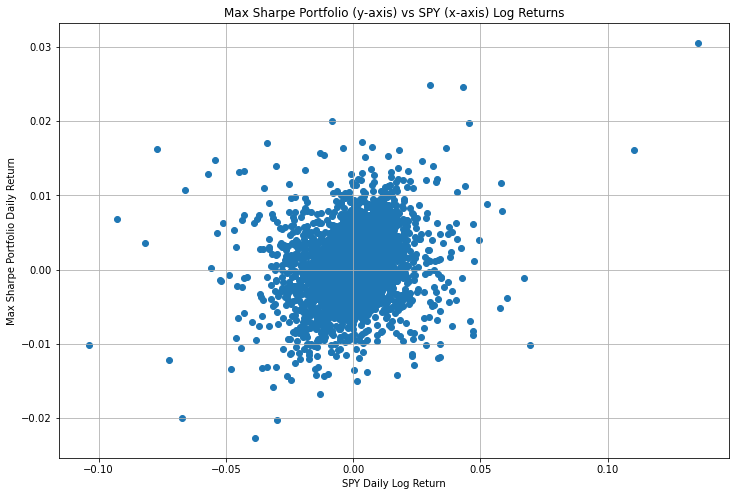

In [161]:
# Visualize the relationship
plt.figure(figsize=aspect_ratio)
plt.scatter(result_df_beta_calc['SPY'], result_df_beta_calc['MaxSharpePortfolio'], marker='o', label='actual')
plt.title('Max Sharpe Portfolio (y-axis) vs SPY (x-axis) Log Returns')
plt.xlabel('SPY Daily Log Return')
plt.ylabel('Max Sharpe Portfolio Daily Return')
plt.grid()
plt.show()

In [162]:
result_df_beta_calc.corr()

,SPY,MaxSharpePortfolio
SPY,1.000000,0.232436
MaxSharpePortfolio,0.232436,1.000000


In [184]:
# Perform Linear Regression
max_sharpe_reg = LinearRegression()
max_sharpe_reg.fit(result_df_beta_calc.dropna()[['SPY']], result_df_beta_calc.dropna()[['MaxSharpePortfolio']])

# Output the alpha and beta
alpha = max_sharpe_reg.intercept_
beta = max_sharpe_reg.coef_

print("Alpha:", alpha)
print("Beta:", beta)

Alpha: [0.00031911]
Beta: [[0.07785108]]


A beta of 0.078 is significantly lower than 1, which suggests that the portfolio is much less volatile than the market. This means that the portfolio’s value is expected to change very little in response to market moves. Though the portfolio has lower risk and sensitivity to the market, there is a trade off of potential lower returns as it may not capture the full upwards movement of a growing market. A low beta of 0.078 is good for conservative investors who are risk averse and prefer stability.

### Question 14
#### Construct 4 variations of the equal weighted portfolio as follows


    a. All benchmarks, i.e, just the base instruments themselves, without either technical strategy. (Ensure this portfolio also starts on the same date as your strategy portfolio from #4.) Note down the Sharpe of this BMK-only portfolio.

    b. MAFlat strategy on all the instruments. Note down the Sharpe of this MAFlat strategy portfolio. The lookback parameters should be the same as what you chose in #2.

    c. MAShort strategy on all the instruments. Note down the Sharpe of this MAShort strategy portfolio. The lookback parameters should be the same as what you chose in #2.

    d. BollingerBand strategy on all the instruments using the same parameters you chose in #2. Note down its Sharpe.
    
Do any of these 4 portfolios outperform your chosen maxSharpe portfolio from #10? 

#### NOTE: strategy portfolio start date: 2000-11-10

#### BMK-only Portfolio

In [185]:
#merge all the data frames from the resulting 
BMK_df = pd.merge(AAPL_logReturns, EXC_logReturns, left_index=True, right_index=True)
BMK_df = pd.merge(BMK_df, GE_logReturns, left_index=True, right_index=True)
BMK_df = pd.merge(BMK_df, PFE_logReturns, left_index=True, right_index=True)
BMK_df = pd.merge(BMK_df, SPY_logReturns, left_index=True, right_index=True)
BMK_df = pd.merge(BMK_df, FBNDX_logReturns, left_index=True, right_index=True)
BMK_df = pd.merge(BMK_df, SPGSCI_logReturns, left_index=True, right_index=True)
BMK_df = pd.merge(BMK_df, GBP_logReturns, left_index=True, right_index=True)


#ensure same date
BMK_df.index = pd.to_datetime(BMK_df.index)

#filter the DataFrame to start from 2000-11-10
BMK_df = BMK_df[BMK_df.index >= '2000-11-10']
BMK_df

,AAPL,EXC,GE,PFE,SPY,FBNDX,SPGSCI,GBP
Date,,,,,,,,
2000-11-10,-0.057340,0.013706,-0.012680,-0.011268,-0.024626,0.000000,-0.001055,-0.005527
2000-11-13,0.016259,0.006263,-0.046299,-0.044902,-0.007807,0.001430,0.008611,0.008731
2000-11-14,0.044171,-0.028498,0.025196,0.014706,0.025940,0.001428,0.014465,-0.005020
2000-11-15,-0.018691,0.003207,-0.004751,0.005822,0.003140,0.001426,0.020037,-0.002660
2000-11-16,-0.045024,0.022165,0.002378,0.005789,-0.015798,0.001423,-0.015001,-0.000982
...,...,...,...,...,...,...,...,...
2018-12-24,-0.026215,-0.045929,-0.032697,-0.033466,-0.026778,0.001303,-0.034847,0.004812
2018-12-26,0.068053,0.014721,0.065712,0.039647,0.049290,-0.003914,0.034605,-0.005762
2018-12-27,-0.006511,0.006722,-0.016371,0.015522,0.007648,-0.002618,-0.016042,0.000870


In [186]:
calcSummaryStatistics(BMK_df)

,AAPL,EXC,GE,PFE,SPY,FBNDX,SPGSCI,GBP
Average Annual Return,26.76%,2.43%,-11.26%,-0.13%,3.30%,0.53%,2.36%,-0.67%
Annual Risk,37.56%,25.57%,31.02%,24.30%,19.36%,3.80%,23.61%,9.52%
Max Drawdown,-93.82%,-128.08%,-211.69%,-140.32%,-83.18%,-23.70%,-118.65%,-55.30%
Success Ratio,52.34%,52.25%,49.97%,50.32%,54.13%,64.81%,51.81%,50.84%


,AAPL,EXC,GE,PFE,SPY,FBNDX,SPGSCI,GBP
Sharpe Ratio,0.712543,0.095101,-0.36296,-0.005182,0.17061,0.139241,0.099943,-0.069887


In [187]:
#calculate sharpe for this portfolio
# BMK_portfolio_sharpe= (BMK_df.mean(axis=1) * 260).mean() / (BMK_df.std(axis=1) * np.sqrt(260)).mean()
# BMK_portfolio_sharpe

BMK_portfolio_sharpe = (np.sqrt(260) * (BMK_df.dot(np.ones(8) / 8).mean() / BMK_df.dot(np.ones(8) / 8).std()))
BMK_portfolio_sharpe

# np.sqrt(260) * (result_df.dot(np.ones(8) / 8).mean() / result_df.dot(np.ones(8) / 8).std())
# print("Annualized Sharpe Ratio of EW Portfolio:", np.sqrt(260) * (result_df.dot(np.ones(8) / 8).mean() / result_df.dot(np.ones(8) / 8).std()))

0.21369679475453415

#### MAFlat strategy portfolio

In [188]:
#merge all the data frames from the resulting 
MAFlat_df = pd.merge(AAPL_MAFlat, EXC_MAFlat, left_index=True, right_index=True)
MAFlat_df = pd.merge(MAFlat_df, GE_MAFlat, left_index=True, right_index=True)
MAFlat_df = pd.merge(MAFlat_df, PFE_MAFlat, left_index=True, right_index=True)
MAFlat_df = pd.merge(MAFlat_df, SPY_MAFlat, left_index=True, right_index=True)
MAFlat_df = pd.merge(MAFlat_df, FBNDX_MAFlat, left_index=True, right_index=True)
MAFlat_df = pd.merge(MAFlat_df, SPGSCI_MAFlat, left_index=True, right_index=True)
MAFlat_df = pd.merge(MAFlat_df, GBP_MAFlat, left_index=True, right_index=True)


# #ensure same date
# MAFlat_df.index = pd.to_datetime(MAFlat_df.index)

# #filter the DataFrame to start from 2000-11-10
# MAFlat_df = MAFlat_df[MAFlat_df.index >= '2000-11-10']
MAFlat_df

,AAPL-MAFlat,EXC-MAFlat,GE-MAFlat,PFE-MAFlat,SPY-MAFlat,FBNDX-MAFlat,SPGSCI-MAFlat,GBP-MAFlat
Date,,,,,,,,
2000-11-10,-0.0,0.000000,-0.000000,-0.000000,-0.0,0.000000,-0.000000,-0.0
2000-11-13,0.0,0.006263,-0.046299,-0.044902,-0.0,0.001430,0.008611,0.0
2000-11-14,0.0,-0.028498,0.025196,0.014706,0.0,0.001428,0.014465,-0.0
2000-11-15,-0.0,0.003207,-0.004751,0.005822,0.0,0.001426,0.020037,-0.0
2000-11-16,-0.0,0.022165,0.002378,0.005789,-0.0,0.001423,-0.015001,-0.0
...,...,...,...,...,...,...,...,...
2018-12-24,-0.0,-0.045929,-0.000000,-0.033466,-0.0,0.000000,-0.000000,0.0
2018-12-26,0.0,0.014721,0.000000,0.039647,0.0,-0.000000,0.000000,-0.0
2018-12-27,-0.0,0.006722,-0.000000,0.015522,0.0,-0.000000,-0.000000,0.0


In [189]:
#calculate sharpe for this portfolio
# MAFlat_portfolio_sharpe= (MAFlat_df.mean(axis=1) * 260).mean() / (MAFlat_df.std(axis=1) * np.sqrt(260)).mean()
# MAFlat_portfolio_sharpe

MAFlat_portfolio_sharpe = (np.sqrt(260) * (MAFlat_df.dot(np.ones(8) / 8).mean() / MAFlat_df.dot(np.ones(8) / 8).std()))
MAFlat_portfolio_sharpe

0.7042274392466608

#### MAShort strategy portfolio

In [190]:
#merge all the data frames from the resulting 
MAShort_df = pd.merge(AAPL_MAShort, EXC_MAShort, left_index=True, right_index=True)
MAShort_df = pd.merge(MAShort_df, GE_MAShort, left_index=True, right_index=True)
MAShort_df = pd.merge(MAShort_df, PFE_MAShort, left_index=True, right_index=True)
MAShort_df = pd.merge(MAShort_df, SPY_MAShort, left_index=True, right_index=True)
MAShort_df = pd.merge(MAShort_df, FBNDX_MAShort, left_index=True, right_index=True)
MAShort_df = pd.merge(MAShort_df, SPGSCI_MAShort, left_index=True, right_index=True)
MAShort_df = pd.merge(MAShort_df, GBP_MAShort, left_index=True, right_index=True)


# #ensure same date
# MAShort_df.index = pd.to_datetime(MAShort_df.index)

# #filter the DataFrame to start from 2000-11-10
# MAShort_df = MAShort_df[MAShort_df.index >= '2000-11-10']
MAShort_df

,AAPL-MAShort,EXC-MAShort,GE-MAShort,PFE-MAShort,SPY-MAShort,FBNDX-MAShort,SPGSCI-MAShort,GBP-MAShort
Date,,,,,,,,
2000-11-10,0.057340,-0.013706,0.012680,0.011268,0.024626,-0.000000,0.001055,0.005527
2000-11-13,-0.016259,0.006263,-0.046299,-0.044902,0.007807,0.001430,0.008611,-0.008731
2000-11-14,-0.044171,-0.028498,0.025196,0.014706,-0.025940,0.001428,0.014465,0.005020
2000-11-15,0.018691,0.003207,-0.004751,0.005822,-0.003140,0.001426,0.020037,0.002660
2000-11-16,0.045024,0.022165,0.002378,0.005789,0.015798,0.001423,-0.015001,0.000982
...,...,...,...,...,...,...,...,...
2018-12-24,0.026215,-0.045929,0.032697,-0.033466,0.026778,-0.001303,0.034847,-0.004812
2018-12-26,-0.068053,0.014721,-0.065712,0.039647,-0.049290,0.003914,-0.034605,0.005762
2018-12-27,0.006511,0.006722,0.016371,0.015522,-0.007648,0.002618,0.016042,-0.000870


In [191]:
#calculate sharpe for this portfolio
# MAShort_portfolio_sharpe= (MAShort_df.mean(axis=1) * 260).mean() / (MAShort_df.std(axis=1) * np.sqrt(260)).mean()
# MAShort_portfolio_sharpe

MAShort_portfolio_sharpe = (np.sqrt(260) * (MAShort_df.dot(np.ones(8) / 8).mean() / MAShort_df.dot(np.ones(8) / 8).std()))
MAShort_portfolio_sharpe

0.6115423134777943

#### BB strategy portfolio

In [192]:
#merge all the data frames from the resulting 
BB_df = pd.merge(AAPL_BB, EXC_BB, left_index=True, right_index=True)
BB_df = pd.merge(BB_df, GE_BB, left_index=True, right_index=True)
BB_df = pd.merge(BB_df, PFE_BB, left_index=True, right_index=True)
BB_df = pd.merge(BB_df, SPY_BB, left_index=True, right_index=True)
BB_df = pd.merge(BB_df, FBNDX_BB, left_index=True, right_index=True)
BB_df = pd.merge(BB_df, SPGSCI_BB, left_index=True, right_index=True)
BB_df = pd.merge(BB_df, GBP_BB, left_index=True, right_index=True)


# #ensure same date
BB_df.index = pd.to_datetime(BB_df.index)

#filter the DataFrame to start from 2000-11-10
BB_df = BB_df[BB_df.index >= '2000-11-10']
BB_df

,AAPL-BB,EXC-BB,GE-BB,PFE-BB,SPY-BB,FBNDX-BB,SPGSCI-BB,GBP-BB
Date,,,,,,,,
2000-11-10,-0.000000,0.000000,-0.0,-0.000000,-0.000000,0.000000,-0.000000,-0.005527
2000-11-13,0.000000,0.000000,-0.0,-0.000000,-0.000000,0.000000,0.000000,0.008731
2000-11-14,0.000000,-0.000000,0.0,0.000000,0.000000,0.000000,0.000000,-0.005020
2000-11-15,-0.000000,0.000000,-0.0,0.000000,0.000000,0.000000,-0.020037,-0.002660
2000-11-16,-0.000000,0.000000,0.0,0.000000,-0.000000,0.000000,0.015001,-0.000982
...,...,...,...,...,...,...,...,...
2018-12-24,-0.026215,-0.000000,-0.0,-0.000000,-0.026778,-0.001303,-0.034847,0.004812
2018-12-26,0.068053,0.014721,0.0,0.039647,0.049290,0.003914,0.034605,-0.000000
2018-12-27,-0.006511,0.006722,-0.0,0.015522,0.007648,0.002618,-0.016042,0.000000


In [193]:
#calculate sharpe for this portfolio
# BB_portfolio_sharpe= (BB_df.mean(axis=1) * 260).mean() / (BB_df.std(axis=1) * np.sqrt(260)).mean()
# BB_portfolio_sharpe

BB_portfolio_sharpe = (np.sqrt(260) * (BB_df.dot(np.ones(8) / 8).mean() / BB_df.dot(np.ones(8) / 8).std()))
BB_portfolio_sharpe

0.05935722030264543

#### Do any of these 4 portfolios outperform your chosen maxSharpe portfolio from #10? 

In [194]:
#print sharpe ratios of each strategy
portfolio_sharpe_ratios = pd.DataFrame(columns=["BMK-Only Portfolio","MA-Flat-Only Portfolio","MA-Short-Only Portfolio","BB-Only Portfolio","Max Sharpe Portfolio"])
portfolio_sharpe_ratios.loc["Sharpe Ratios"] = [BMK_portfolio_sharpe,MAFlat_portfolio_sharpe,MAShort_portfolio_sharpe,BB_portfolio_sharpe,max_sharpe]
portfolio_sharpe_ratios

,BMK-Only Portfolio,MA-Flat-Only Portfolio,MA-Short-Only Portfolio,BB-Only Portfolio,Max Sharpe Portfolio
Sharpe Ratios,0.213697,0.704227,0.611542,0.059357,1.319515


Absolutely! 

The Max Sharpe Portfolio has demonstrates exceptional performance. With a Sharpe Ratio of 1.32, it stands well above the rest.

In comparison to other portfolios, the Max Sharpe Portfolio, not only surpasses other portfolios but does so by a substantial margin.

#### We pledge on our honor that we have not given nor received any unauthorized assistance on this assignment to/from other groups. Nor have we received any assistance from prior year students."
#### - Anshul Dave, Deepthi Rao, Miranda Chung, Raunak Ghawghawe, Yash Makadia